<a href="https://colab.research.google.com/github/mangesh2maggy/regration_project/blob/main/Bike_Sharing_Demand_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual(Mangesh Doke)

# **Project Summary -**

Bike-sharing systems are a means of renting bicycles. Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.

The increased usage of private vehicles in metropolitan areas has resulted in significant rise in fuel consumption's that have adverse effect on the climate. It has led people in today's society to accept problems like road traffic as the norm. Therefore the government and organzations started adopting measures to facilitate sustainable development to address the issue. Many countries have bike sharing system, such as bike sharing system in South Korea, which started to overcome all this issues and to develop a healthy environment for citizen of Seoul to live. In that context, the Bike Share initiative was launched to tackle the public mobility problem. It provided the people with an alternative to using a sustainable mode of transport for a small distance at a minimal cost. And gave people the freedom to utilize the service by themselves. In a bike-share system, a user could lend a bike from any bike stations and return it to a bike station near the destination and since it involves the activity of pedalling the bike it has beneficial health effects. And the city-wide installation of bike stations improved the accessibility of areas by bikes.

Docking stations are computerized stands for the purpose of pickup and drop off of the rental bikes. Users of public bikes can rent and return rental bikes at any docking station. Users can verify their trip details (distance, duration) and measure of bodily activities (burnt calories). With this kind of smart technology and convenience, the use of Rental bike is increasing every day.

there is a need to manage the bike rental demand and manage the continuous and convenient service for the users. This study proposes a data mining-based approach including weather data to predict whole city public bike demand. A rule-based model is used to predict the number of rental bikes needed at each hour.

# **GitHub Link -**

# **Problem Statement**


It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing a stable supply of rental bikes becomes a major concern, which will grow the business of bike sharing. The crucial part is the prediction of the bike count required at each hour for the stable supply of rental bikes, so it's a need of the hour to solve this problem.
The bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance weather conditions, day of the week, season, hour of the day, etc. can affect the rental behaviors.
Therefore, the proposed model will predict the demand for rental bikes given information about the weather and time of the day.

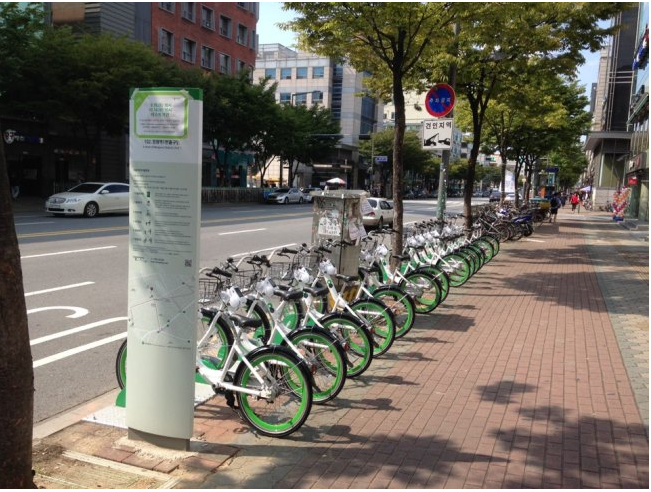


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from prettytable import PrettyTable

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset= pd.read_csv('/content/drive/MyDrive/Dataset/Bike_Sharing_demand_prediction/SeoulBikeData.csv' ,sep=',', encoding='latin' )

In [ ]:
dataset

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'We have total {dataset.shape[0]}  rows')
print(f'We have total {dataset.shape[1]}  columns')

We have total 8760  rows
We have total 14  columns


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

we have good amount of catagorical and numerical features(mostly numerical features) in our dataset

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"we have {dataset.duplicated().sum()} duplicate values")

we have 0 duplicate values


Luckily we don't have any duplicate values in our dataset,Which is a very good thing

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Visualizing the missing values
# Well we don't have any missing values so there is no point of visualizing missing values because it will not show anything
#Still I am adding the code to visualize the missing value
'''plt.figure(figsize=(15, 5))
sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()'''

'plt.figure(figsize=(15, 5))\nsns.heatmap(dataset.isnull(), cbar=True, yticklabels=False)\nplt.xlabel("Column_Name", size=14, weight="bold")\nplt.title("Places of missing values in column",fontweight="bold",size=17)\nplt.show()'

### What did you know about your dataset?

Till now we know that the dataset contains
the number of bikes rented per hour and date information.
* It contains 8760 rows and 14 columns where the columns contains diffrent columns(features) such as:-
* Date
* count of bike rented
* time in hours
* Weather conditions(Temperature, Humidity, seasons, etc)
we don't have any missing as well as duplicate values in our dataset




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe().transpose()
#I am using transpose method for better view.

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

### Variables Description

**Date** - Date on which bikes are rented

**Rented Bike count** - Count of bikes rented at each hour

**Hour** - For how many Hour of the day bike was rented  (0-23)

**Temperature** - Temperature of that day

**Humidity** - Humidity measure

**Windspeed** - Windspeed

**Visibility** - Visibility measure

**Dew Point Temperature** - Dew Point Temperature Measure

**Solar Radiation** - Solar Radiation Measure

**Rainfall** - Rainfall in mm

**Snowfall** - Snowfall measure

**Seasons** - what season it was when bike was rented
  1.   spring item
  2.   summer item
  3.   fall
  4.   winter

**Holiday** - Whether a holiday or not

**Functional Day** - Whether a functional day or not


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# converting date variable in to datetime datatype
dataset['Date'] = dataset['Date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Number of days for which the data is collected
print('Number of days the data is collected: ',dataset['Date'].max()-dataset['Date'].min())

Number of days the data is collected:  364 days 00:00:00


In [ ]:
# Days between which the data is collected
print('Start date: ',dataset['Date'].min())
print('End date: ',dataset['Date'].max())

Start date:  2017-12-01 00:00:00
End date:  2018-11-30 00:00:00




*   The dataset is from a rental bike company based out of Seoul. The goal of this project is to develop a machine learning model that can predict the demand for rental bikes.

*   The dataset contains the hourly weather conditions for a period of 364 days, and other details such as whether a said day was a holiday or not.

*   The dataset containes a total of 8870 records and 14 attributes. There are no duplicate records or missing values in the dataset.





We will rename the Features so that we can iterate without any problem of missing space while execution of code

In [ ]:
# Renaming the columns
dataset.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
dataset.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
#Engineering new features 'month' and 'day_of_week' from the 'date':
#add month, day_of_week columns
for df in [dataset]:
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek

# {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}



*   In a city, it is highly likely that the rental bike demand may follow different pattern over the weekends when people do not generally go to work.

*   To capture this trend, we can define a new feature 'weekend' which indicates whether a said day is a weekend (1) or not (0).



In [ ]:
# engineering new feature 'weekend' from day_of_week
dataset['weekend'] = dataset['day_of_week'].apply(lambda x: 1 if x>4 else 0)

### What all manipulations have you done and insights you found?

*   We had zero null values in our dataset.
*   Zero duplicate values found.
*   We changed the data type of Date Column from 'object' to 'datetime64[ns]'. This was done for featurin engineering.
*   We created two new columns with the help of 'Date' column 'Month' & 'Day' which would further use for EDA and later we drop the Date column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

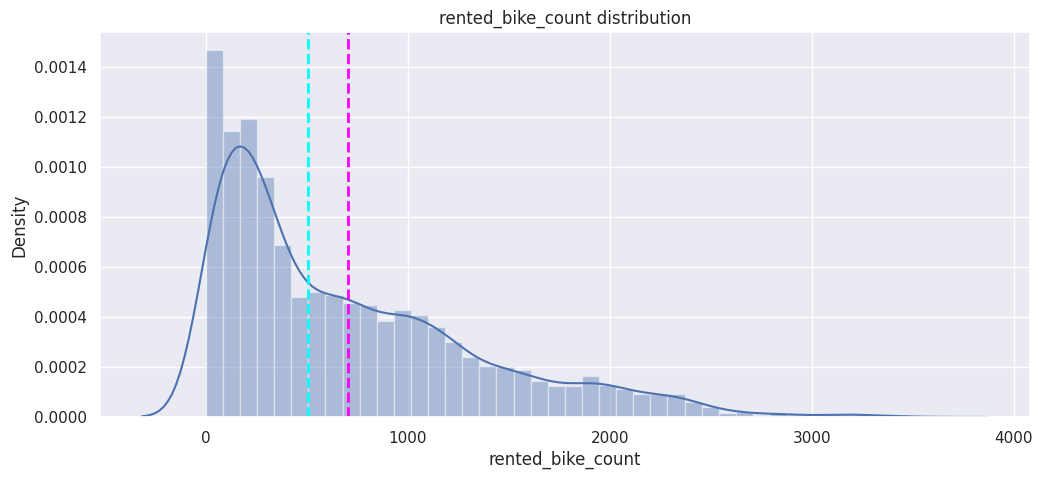

In [ ]:
# Chart - Analyzing the distribution of the dependent variable:

# defining dependent variable separately
dependent_variable = ['rented_bike_count']

# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(12,5))
sns.distplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable
df[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

##### 1. Why did you pick the specific chart?

To check the skewness of the dependent variable

##### 2. What is/are the insight(s) found from the chart?

*   The dependent variable is positively skewed. To get better predictions, it is ideal if the dependent variable is almost normally distributed.
*   To achieve this, we can transform the data by log, sqrt, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not a negative, we can fix it to get the better predications by transform the data by log, sqrt.

#### Chart - 2

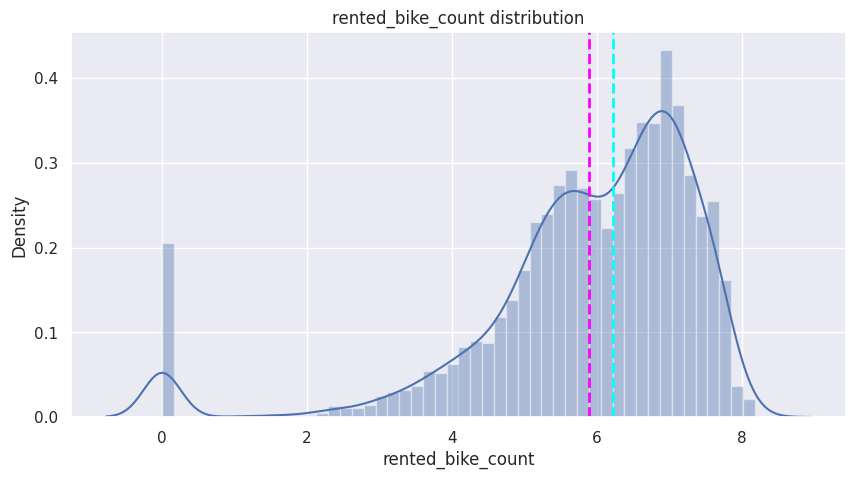

In [ ]:
# Chart - 2 visualization code
# Chart - 2 Log transformation & Square-root transformation:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

We can see that the dependent variable is skewed, lets try to reduce the skewness by appling square root method

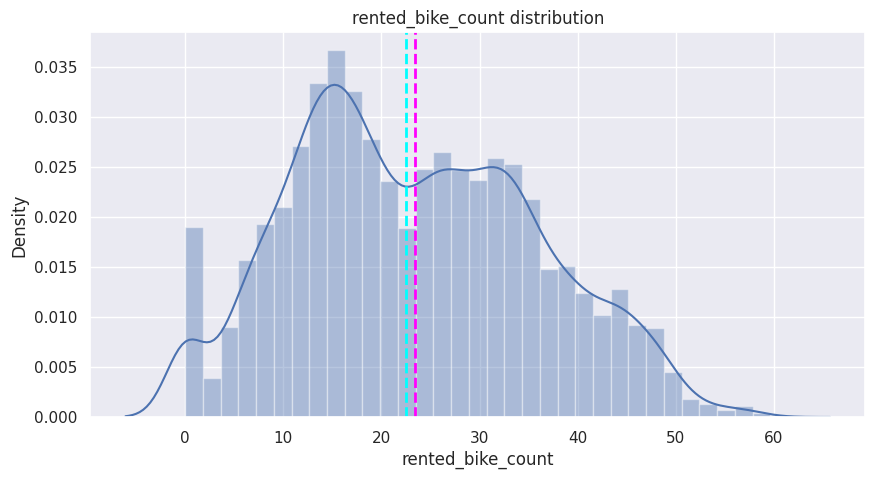

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# # skew of the dependent variable after sqrt transformation
np.sqrt(df[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

Bingo.......! the skewness has decresed, earlier it was negative left skewed but it seem good now.

##### 1. Why did you pick the specific chart?

We are trying to reduce the skewness over here with the help of log transformation or square root tranformation.

##### 2. What is/are the insight(s) found from the chart?

We were able to reduce skewness on square root transformation. Hence we can use square root transformation during the modelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We were able to reduce skewness on square root transformation. Hence we can use square root transformation during the modelling

#### Chart - 3

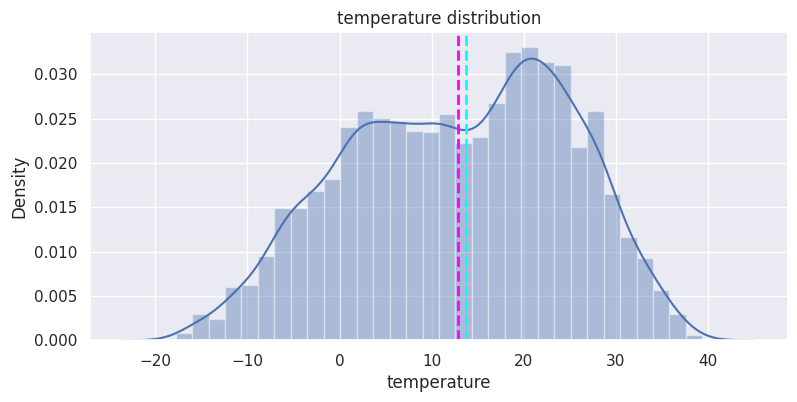

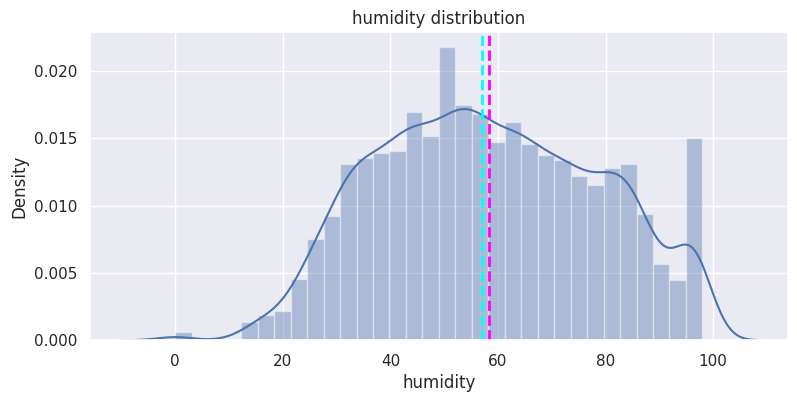

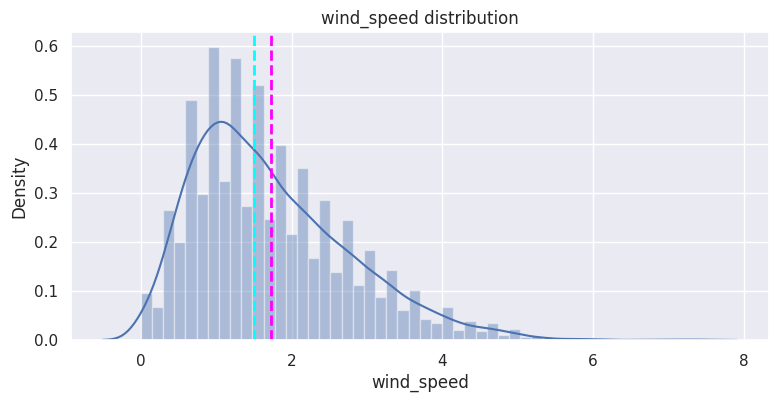

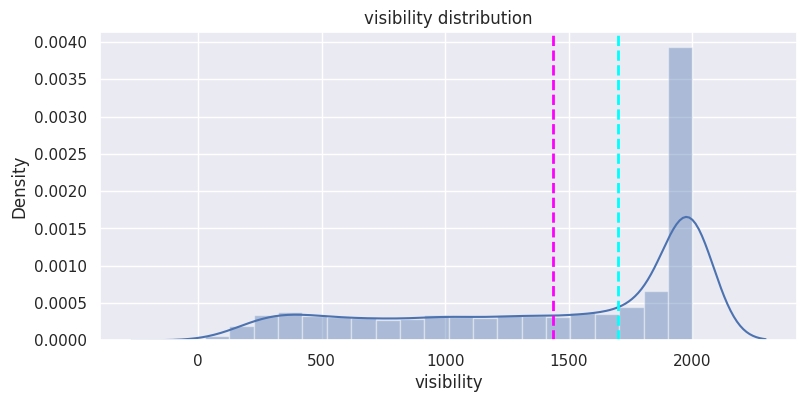

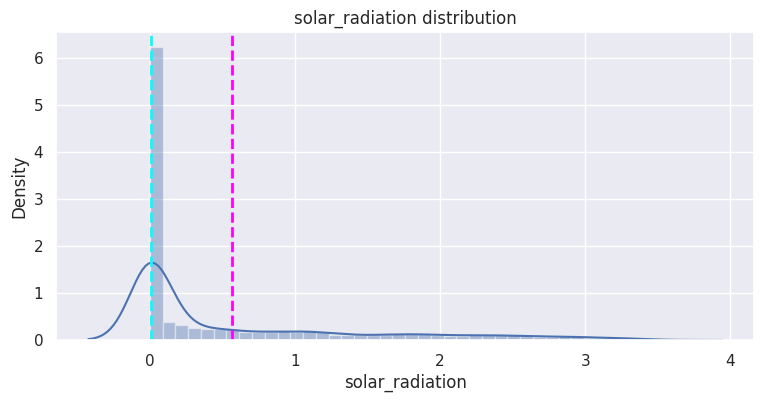

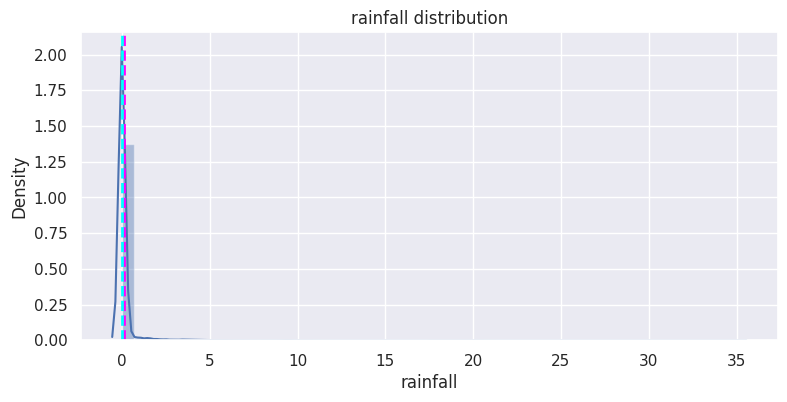

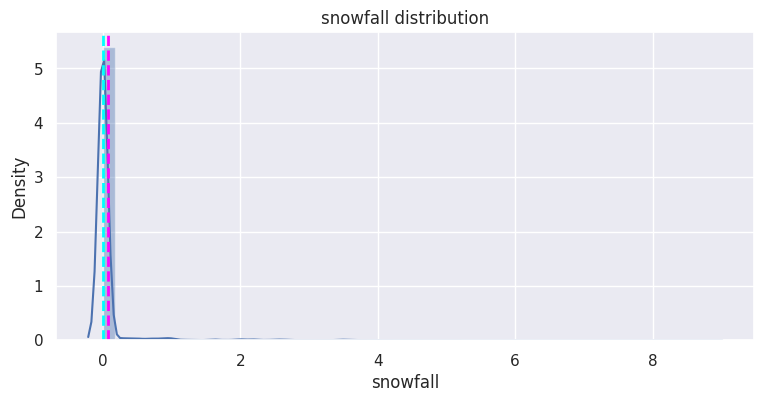

In [ ]:
# Chart - 3 Analyzing the distribution of continuous independent variables:
# defining continuous independent variables separately
continuous_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

# Analyzing the distribution of the continuous independent variables
for col in continuous_var:
  plt.figure(figsize=(9,4))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

To Analyze The distribution of continous independent variable.

##### 2. What is/are the insight(s) found from the chart?



*   Normally distributed attributes: temperature, humidity.
*  Positively skewed attributes: wind, solar_radiation, snowfall, rainfall.

*   Negatively skewed attributes: visibility.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it goona be very helpful in modeling.

#### Chart - 4

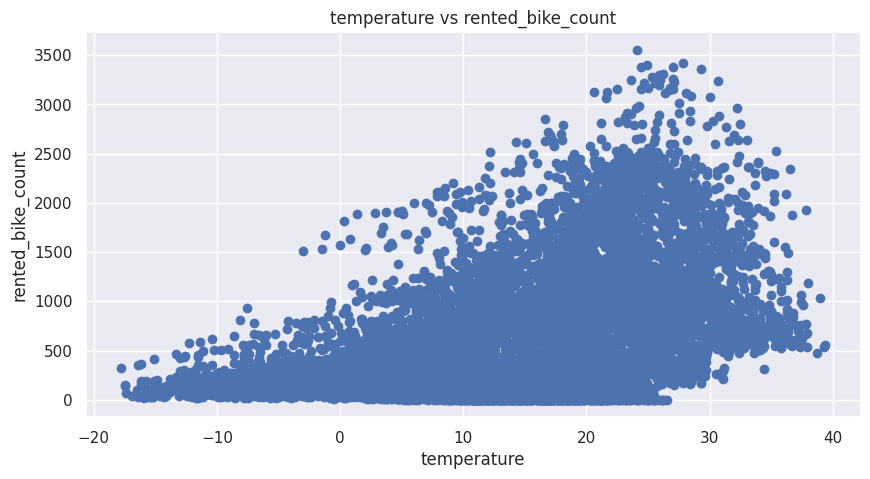

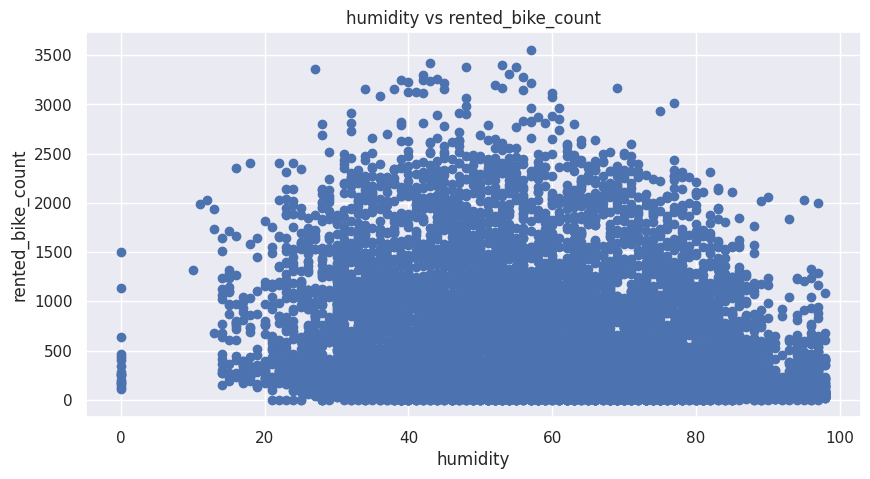

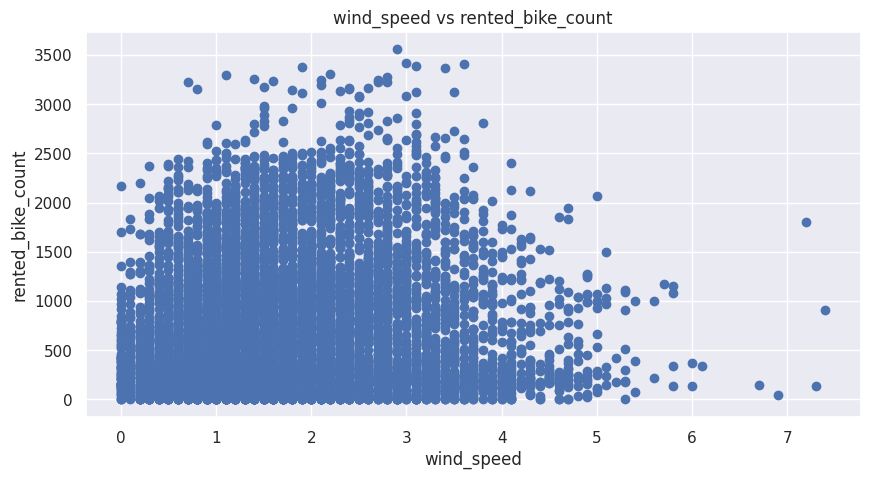

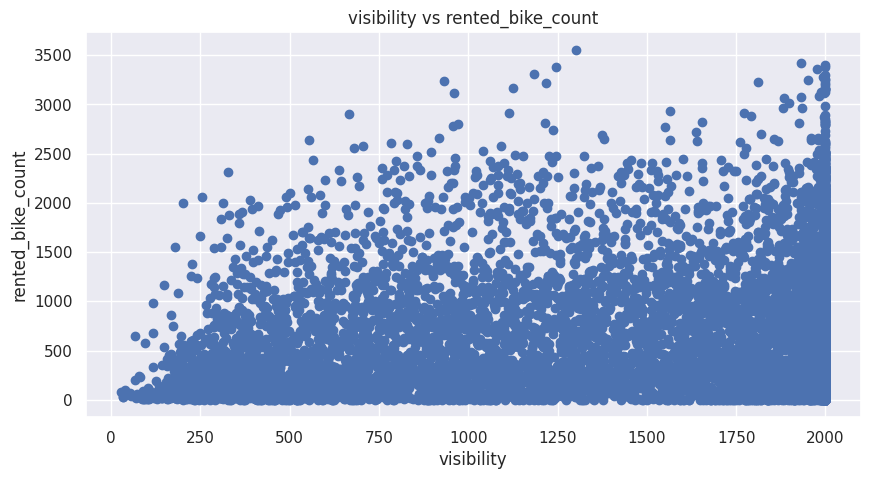

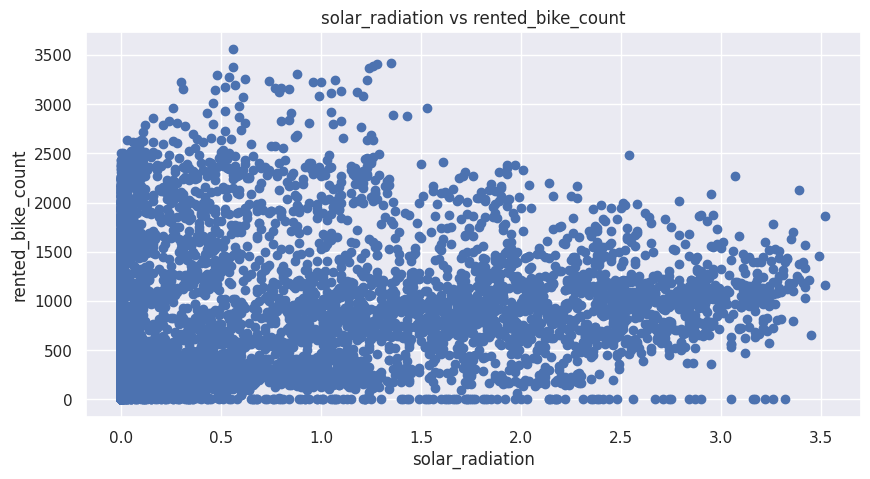

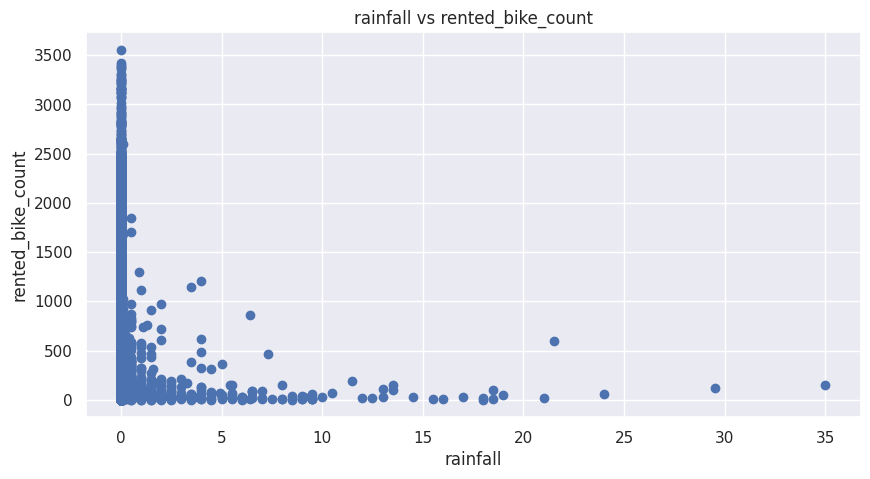

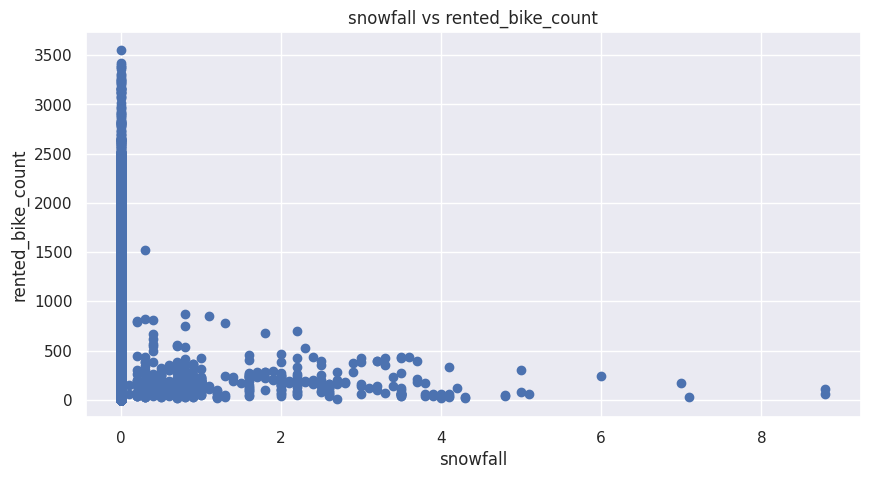

In [ ]:
#Chart -4 : Analyzing the relationship between dependent variable and continuous independent variables:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

This chart will show the relation between the dependent and continous independent variables.

##### 2. What is/are the insight(s) found from the chart?

Positively correlated variables: temperature, windspeed, visibility, solar radiation.
Negatively correlated variables: humidity, rainfall, snowfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will help us to identify the positive and negative corelation between the variables.

#### Chart - 5 to 10

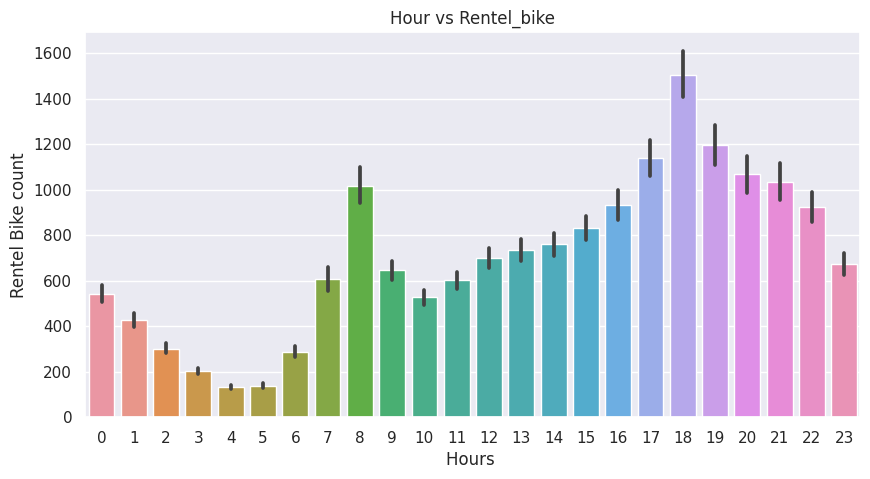

In [ ]:
  #Chart 5 - Analyzing the relationship between dependent variable and categorical independent variables:
  plt.figure(figsize=(10,5))
  sns.barplot(x=dataset['hour'],y=dependent_variable[0],data=df)
  plt.xlabel("Hours ")
  plt.ylabel("Rentel Bike count")
  plt.title('Hour vs Rentel_bike')
  plt.show()

Instead of writing same code for all categoriacl features We can use **for loop** so that we can save time and space while executing the project

#####there are 5 charts within the same code so there are total 10 charts so far

In [ ]:
#Chart 5 - Analyzing the relationship between dependent variable and categorical independent variables:
# defining categorical independent variables separately
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

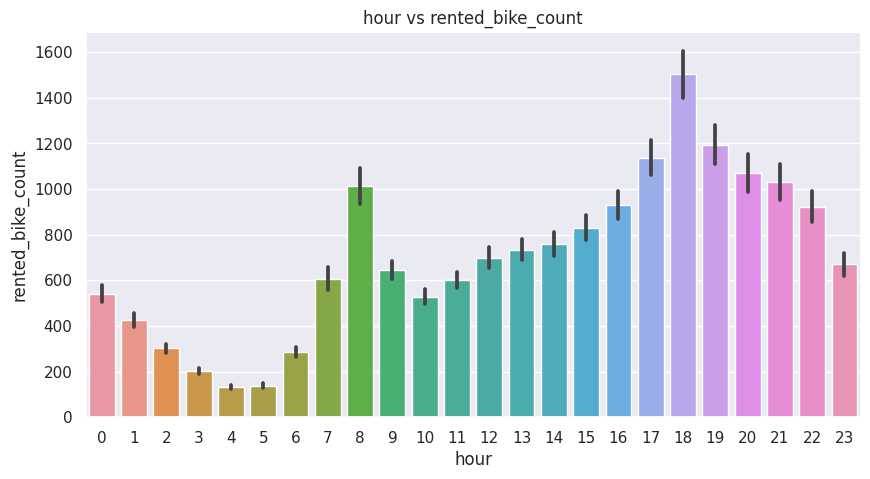

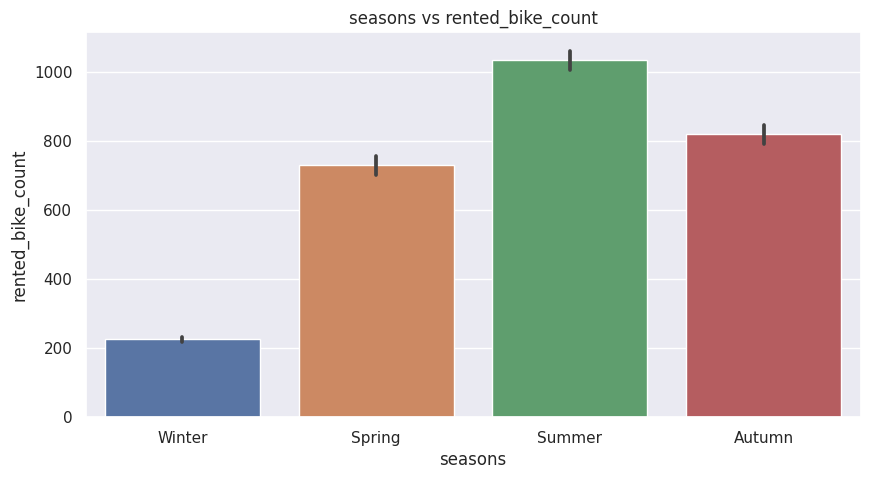

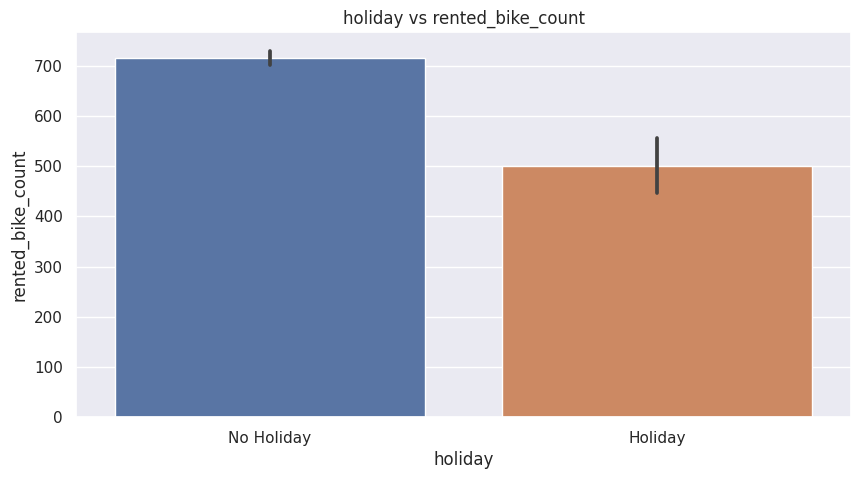

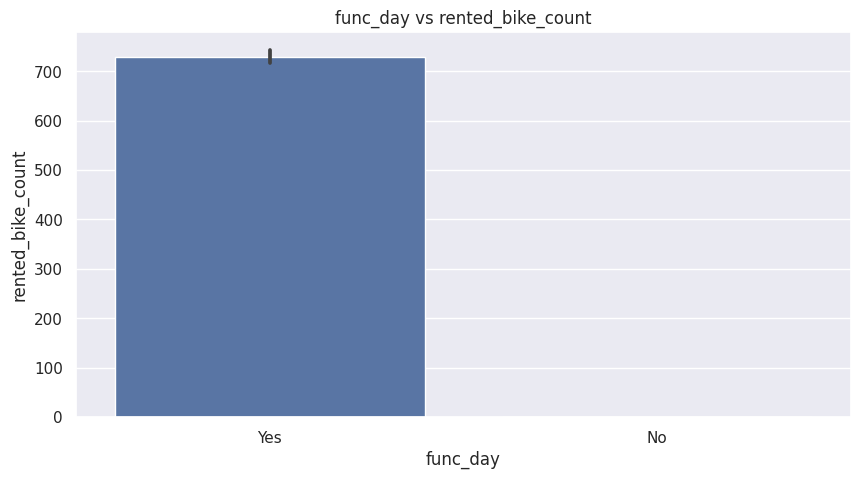

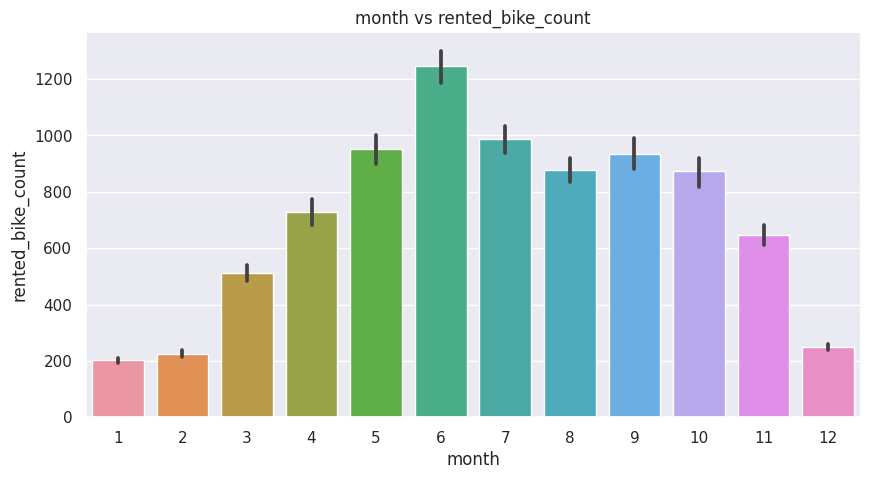

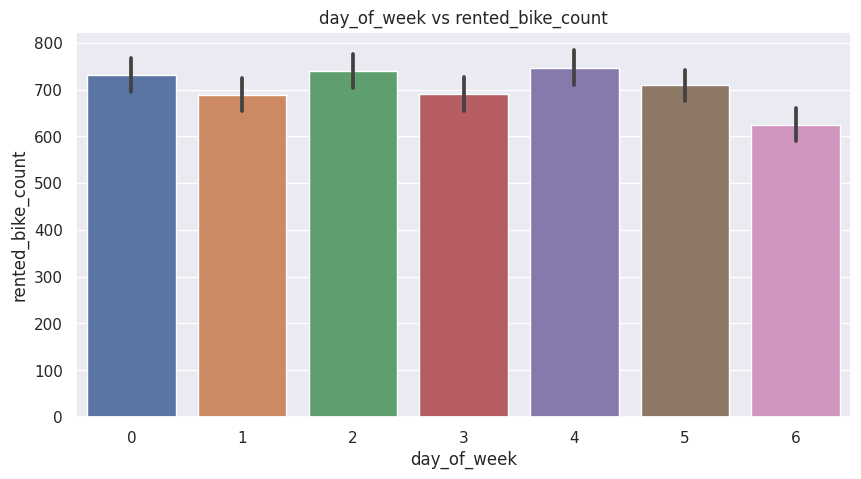

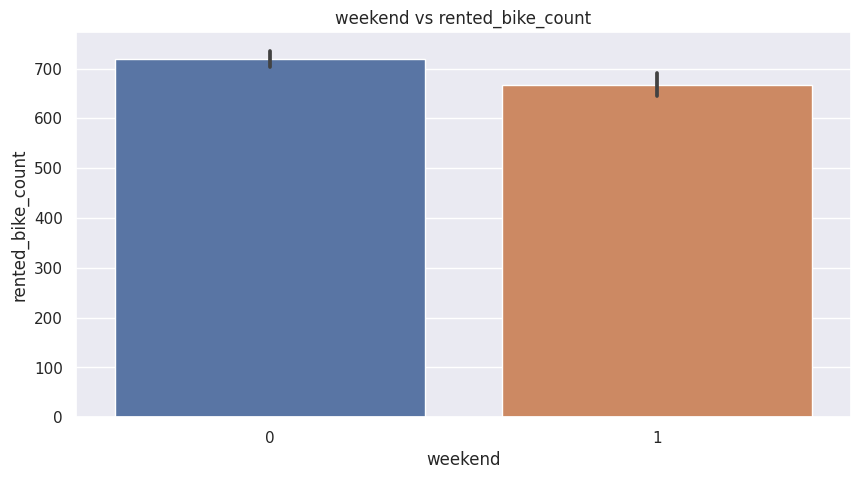

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.barplot(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

In [ ]:
# Highest rented bike count on a functioning day vs a non functioning day
dataset.groupby(['func_day'])['rented_bike_count'].max()

func_day
No        0
Yes    3556
Name: rented_bike_count, dtype: int64

In [ ]:
# Non functioning days in the dataset
df[(dataset['func_day']=='No')]['date'].unique()

array(['2018-04-11T00:00:00.000000000', '2018-05-10T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-09-19T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-10-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-10-06T00:00:00.000000000', '2018-10-09T00:00:00.000000000',
       '2018-11-03T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-11-09T00:00:00.000000000'], dtype='datetime64[ns]')

###### 1. Why did you pick the specific chart?

In these chart, it will show us the all the isights of the dependent variable with cateogrical independent variables.

###### 2. What is/are the insight(s) found from the chart?


1.   The number of bikes rented is on average higher during the rush hours.
2.   The rented bike counts is higher during the summer and lowest during the winter.
3. The rented bike count is higher on working days than on non working days.
4. On a non functioning day, no bikes are rented in all the instances of the data.
5. The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday, and on average, the rented bike counts is lower on weenends than on weekdays.



###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it will gained a insight for the positive business because we get to know about the when mostly the bike rented, when the countis high on which day, on which weather.

**On a non functioning day, no bikes are rented in all the instances of the data.**

#### Chart - 11 - Bike demand throughout the day:


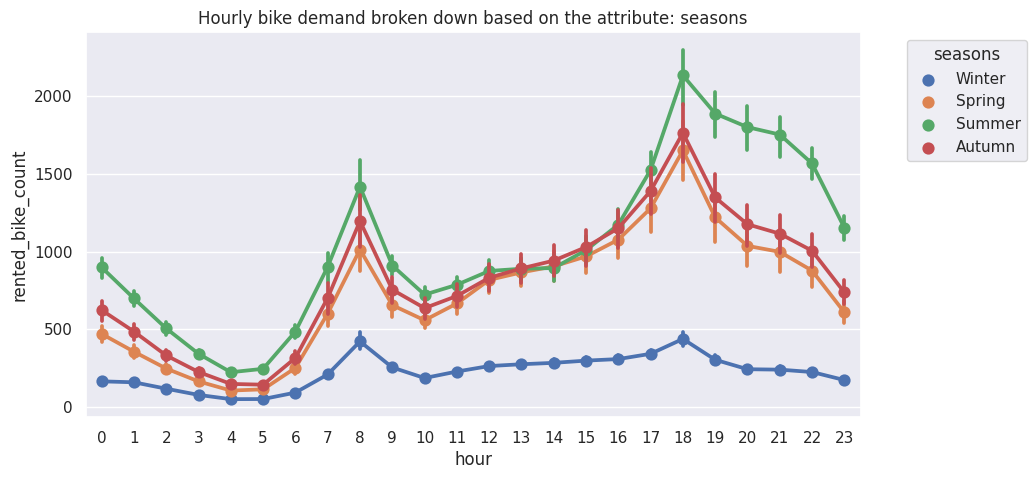

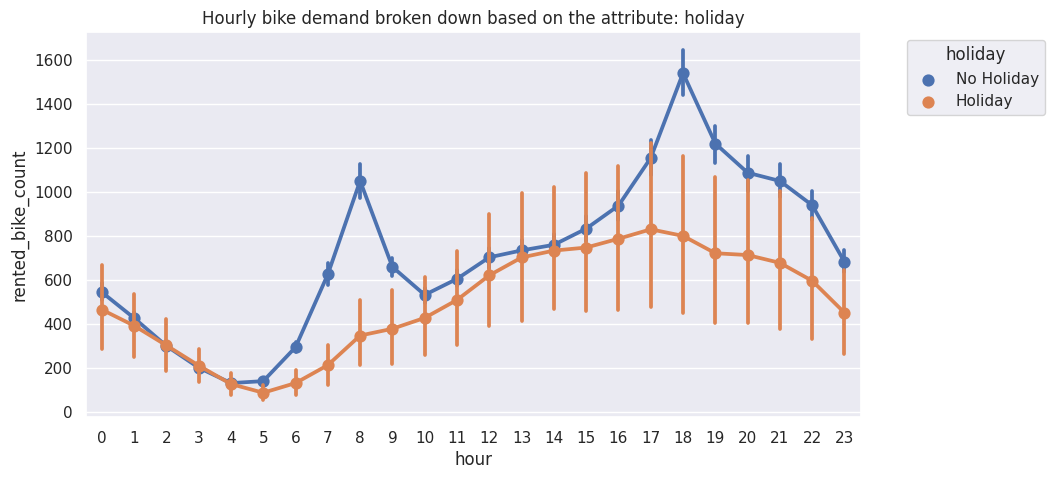

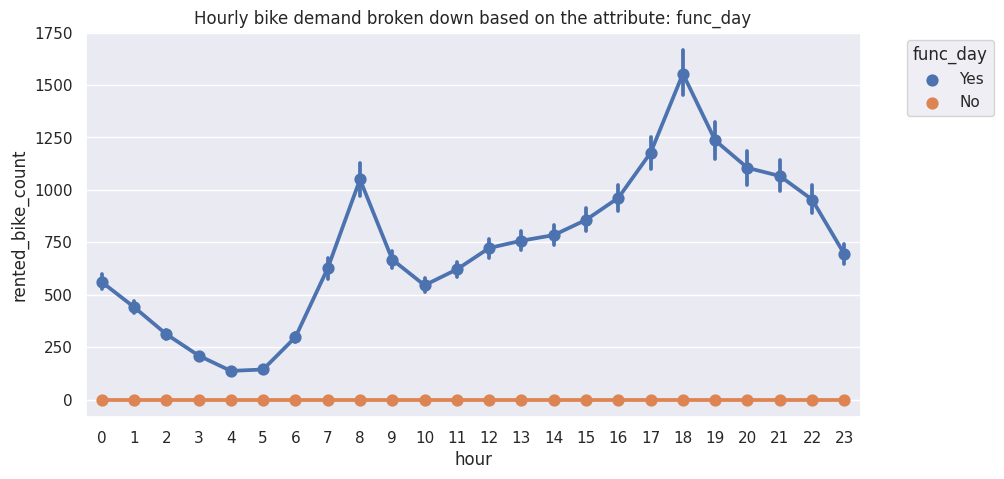

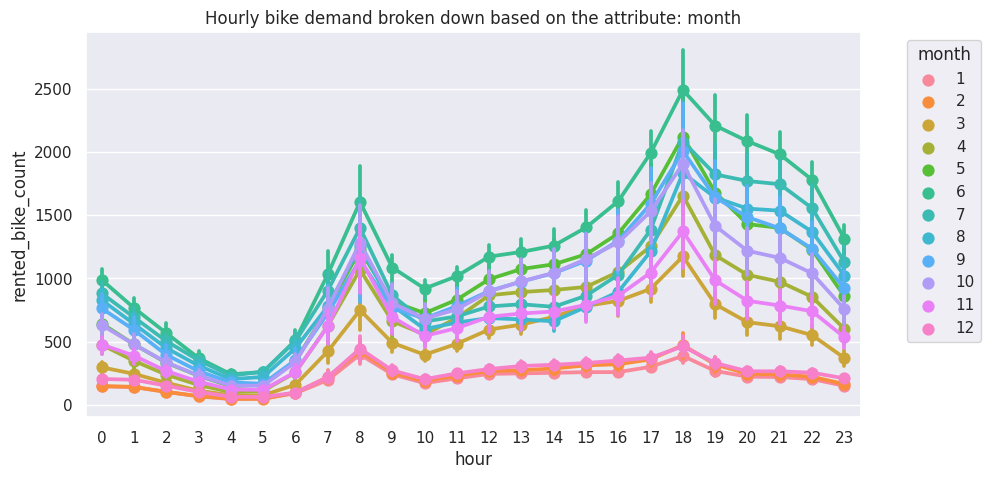

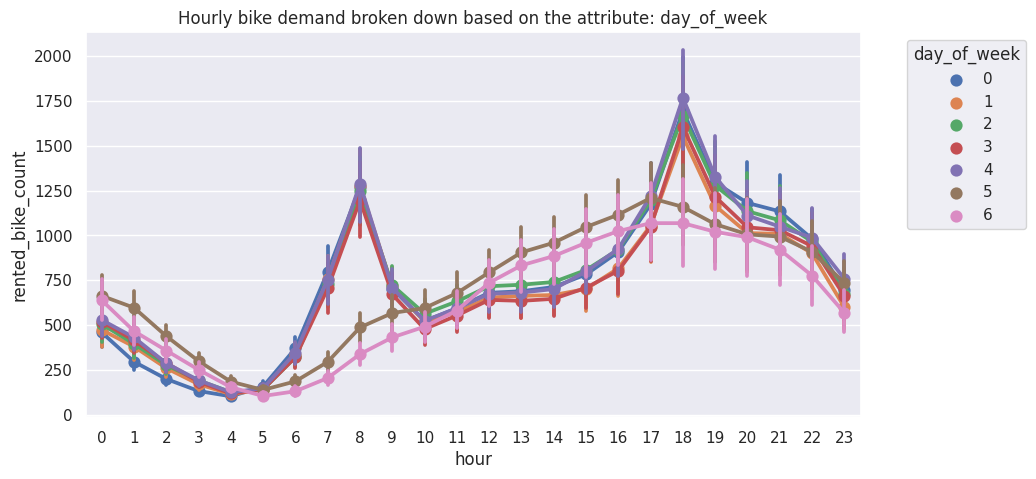

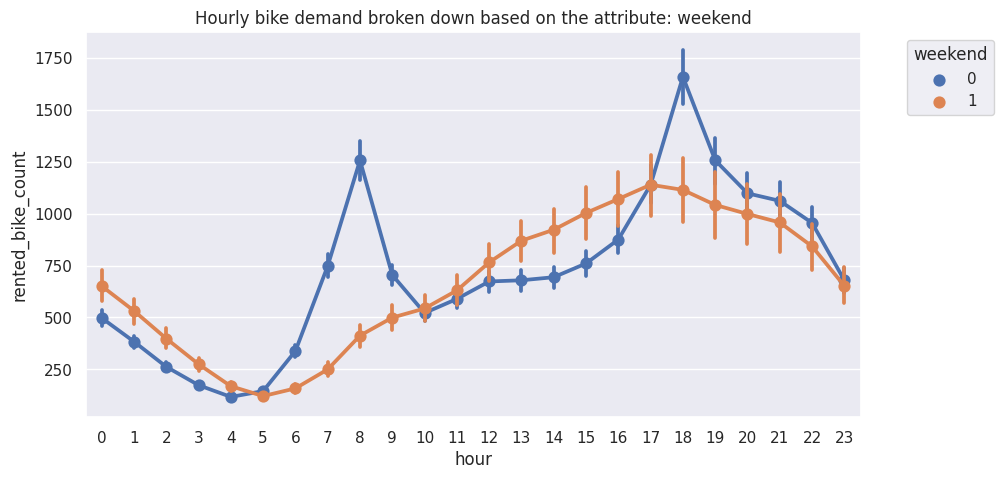

In [ ]:
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

1. Why did you pick the specific chart?

We use the Point plot, so that these plots can show us the at what time, what day and in what season bike is required the most.

2. What is/are the insight(s) found from the chart?



*   In winters the overall demand for rented bikes is comparitively lower than that of other seasons.
*   On a non functioning day, no bikes are rented.
*   The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons






3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason

With the help of this insight its very clear about the demand of the bike, so it gonna be very helpful

#### Chart - 12 - Outlier analysis:


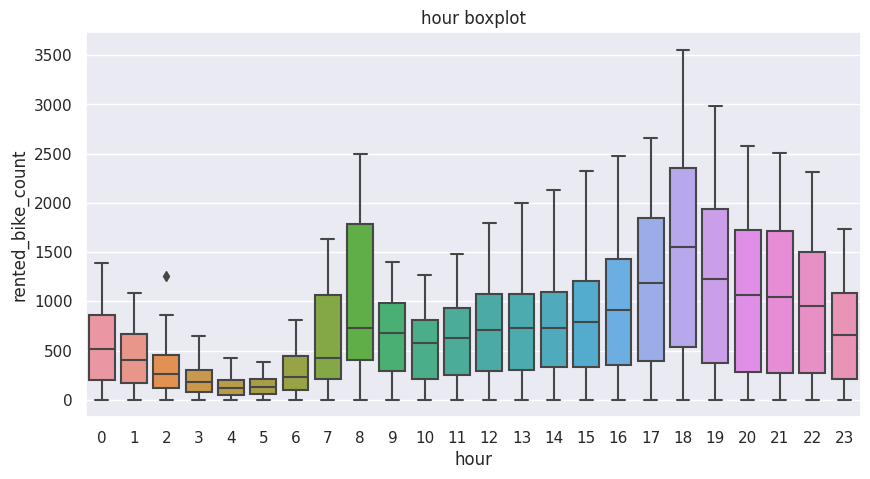

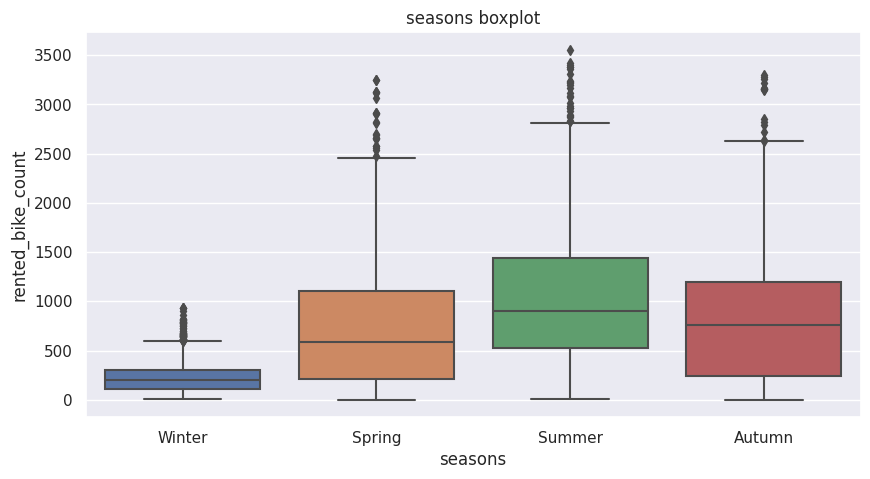

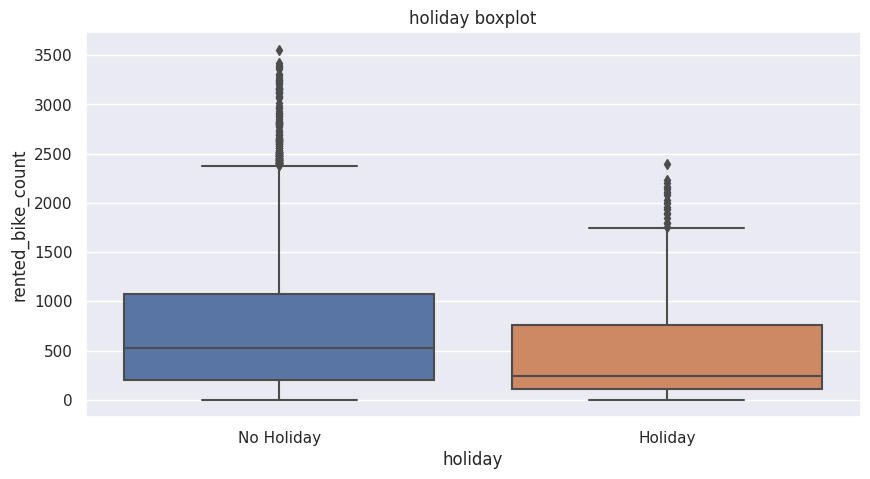

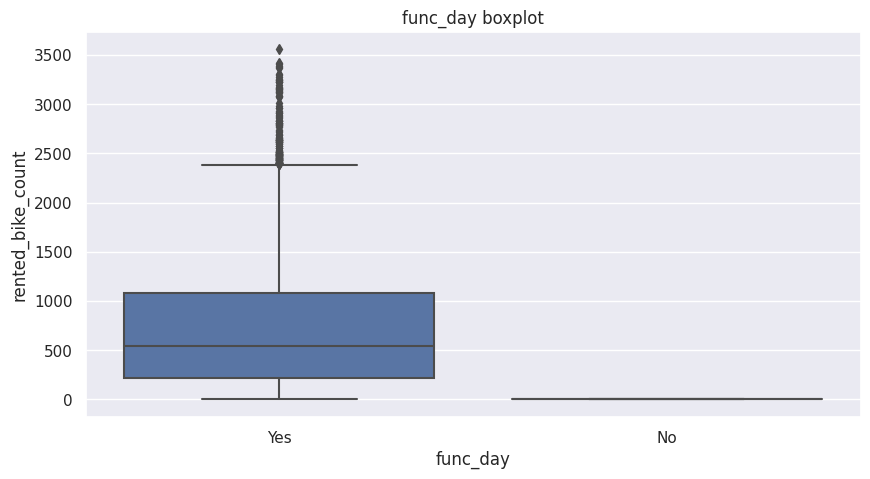

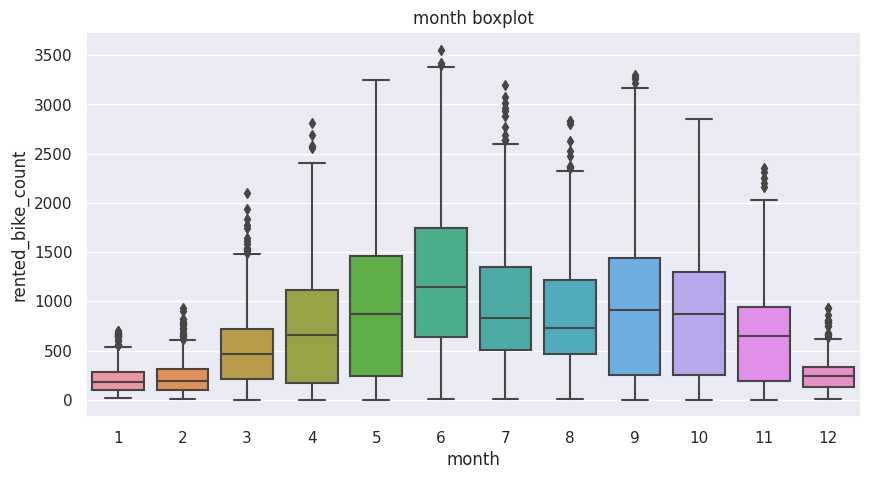

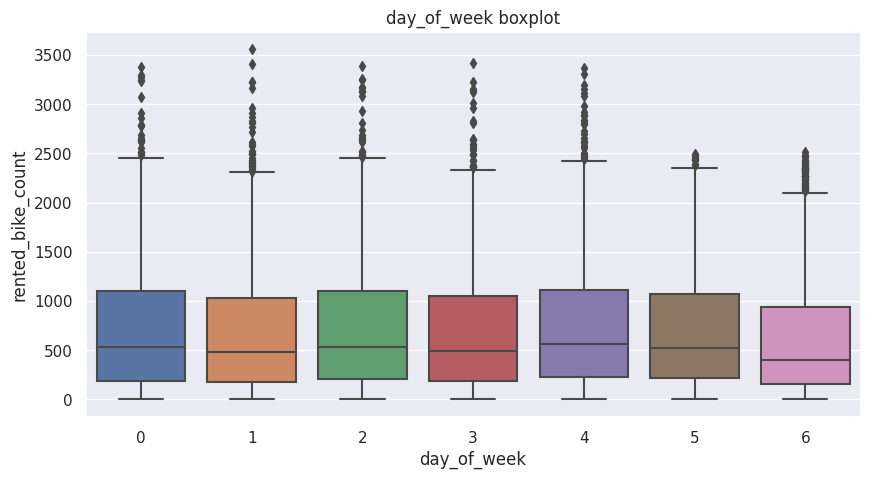

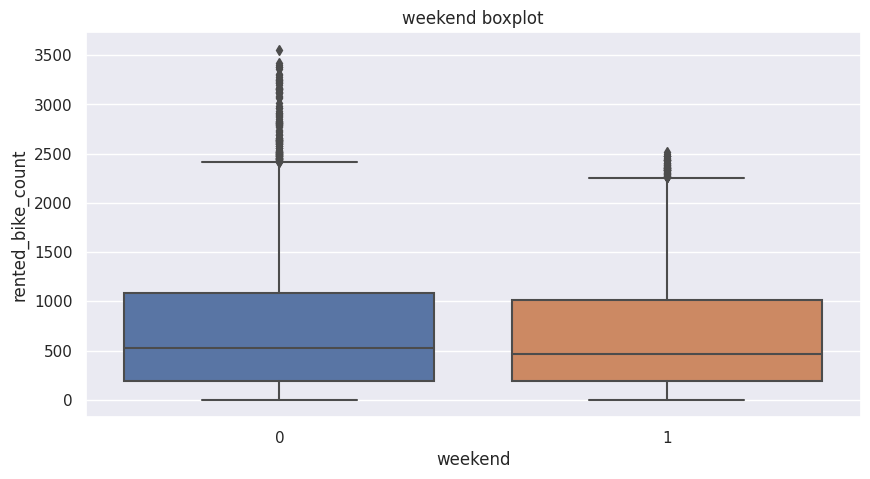

In [ ]:
for col in categorical_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x = col,y = dependent_variable[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

##### 1. Why did you pick the specific chart?



*We use the box-plot to identify the outliers in the data, they will show us very clearly in thi*s.

##### 2. What is/are the insight(s) found from the chart?




 There are outliers in the data and this must be taken into consideration in the model building phase.


#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason



Its shows that there are outliers in the data and it will be taking into the consedration now at the time of model building.

#### Chart - 13

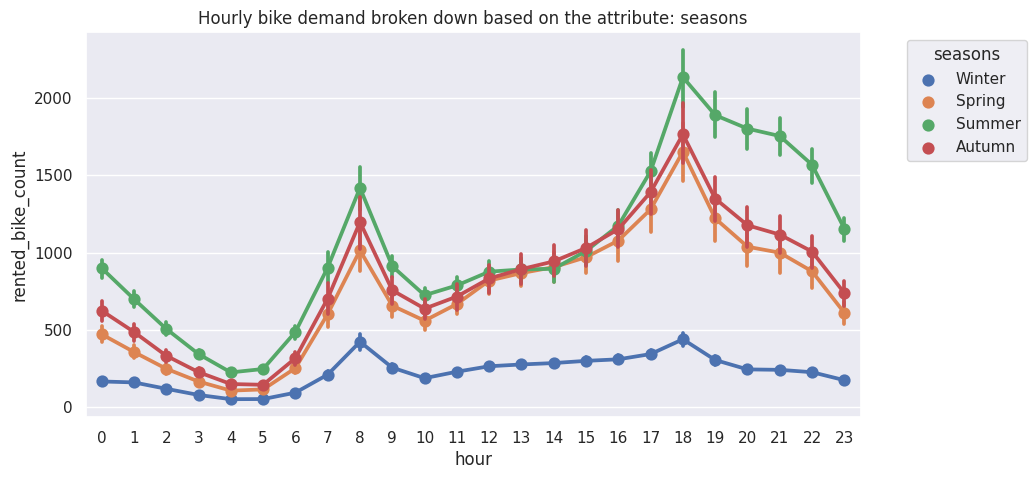

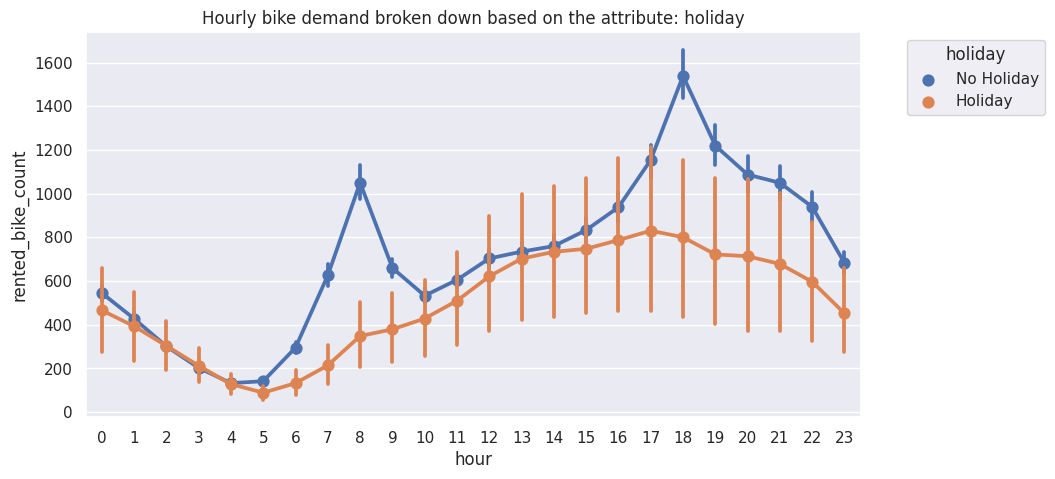

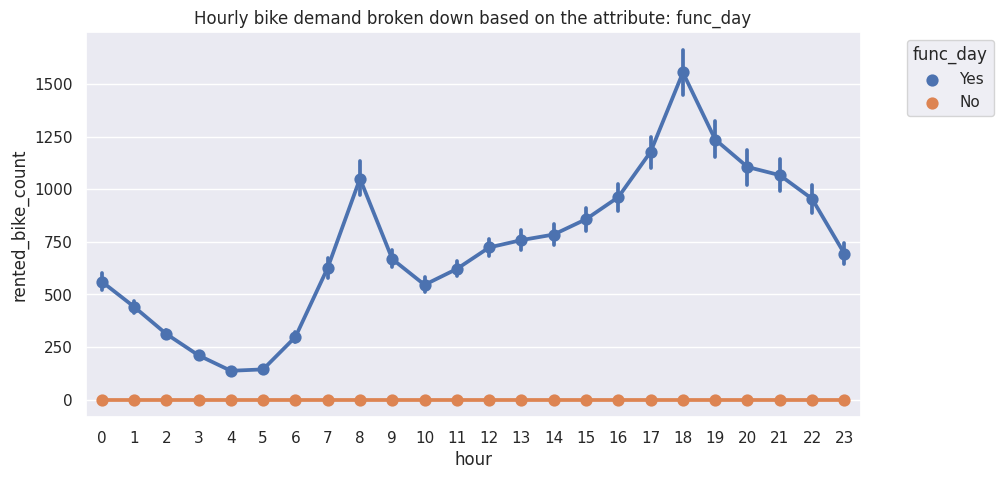

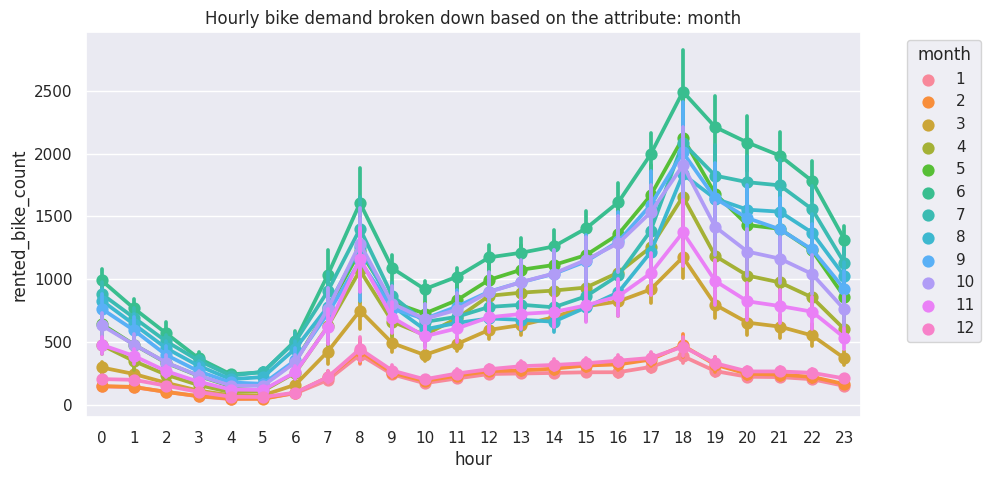

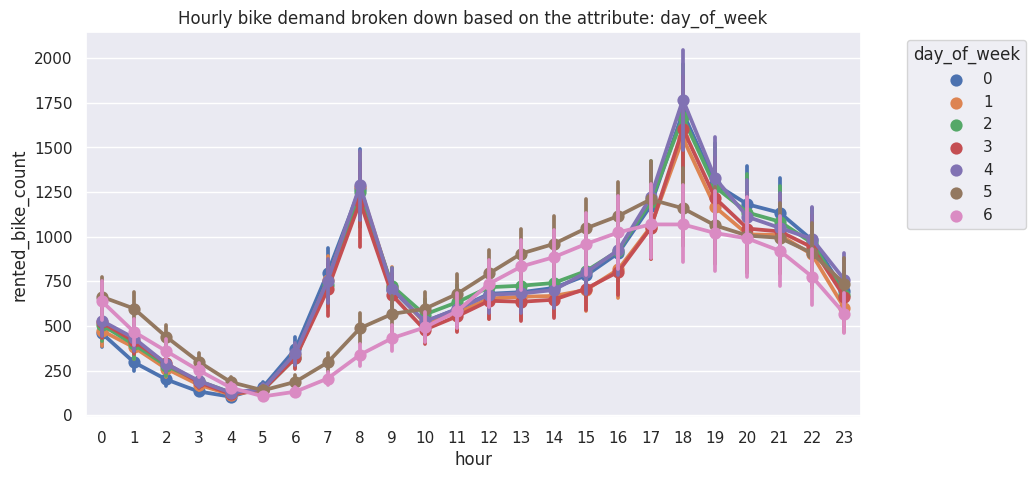

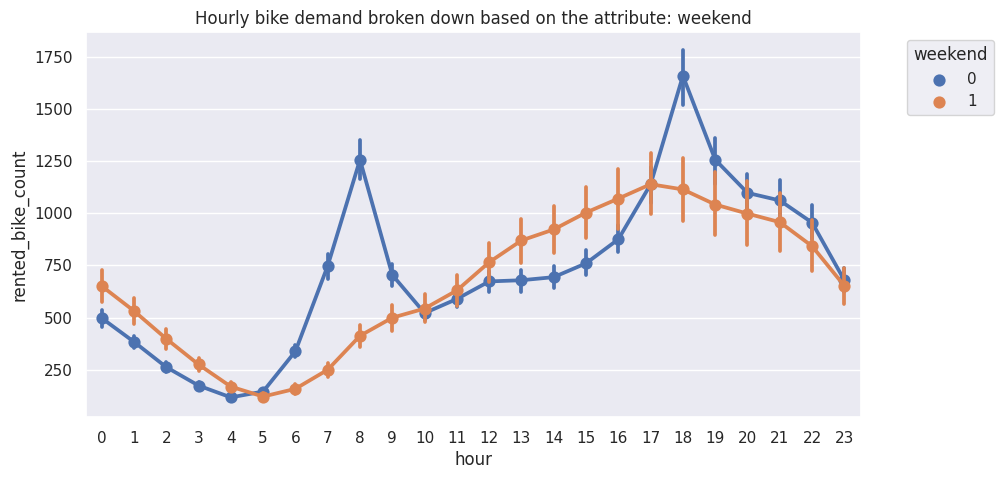

In [ ]:
# Chart - 11 visualization code For Bike demand Throughout the Day in terms of diffrent attributes
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

##### 1. Why did you pick the specific chart?

We use the Point plot, so that these plots can show us the at what time, what day and in what season bike is required the most.

##### 2. What is/are the insight(s) found from the chart?


*   In winters the overall demand for rented bikes is comparitively lower than that of other seasons.
*   On a non functioning day, no bikes are rented.
*   The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


With the help of this insight its very clear about the demand of the bike, so it gonna be very helpful

#### Chart - 14 - Correlation Heatmap

<Axes: title={'center': 'Correlation Analysis'}>

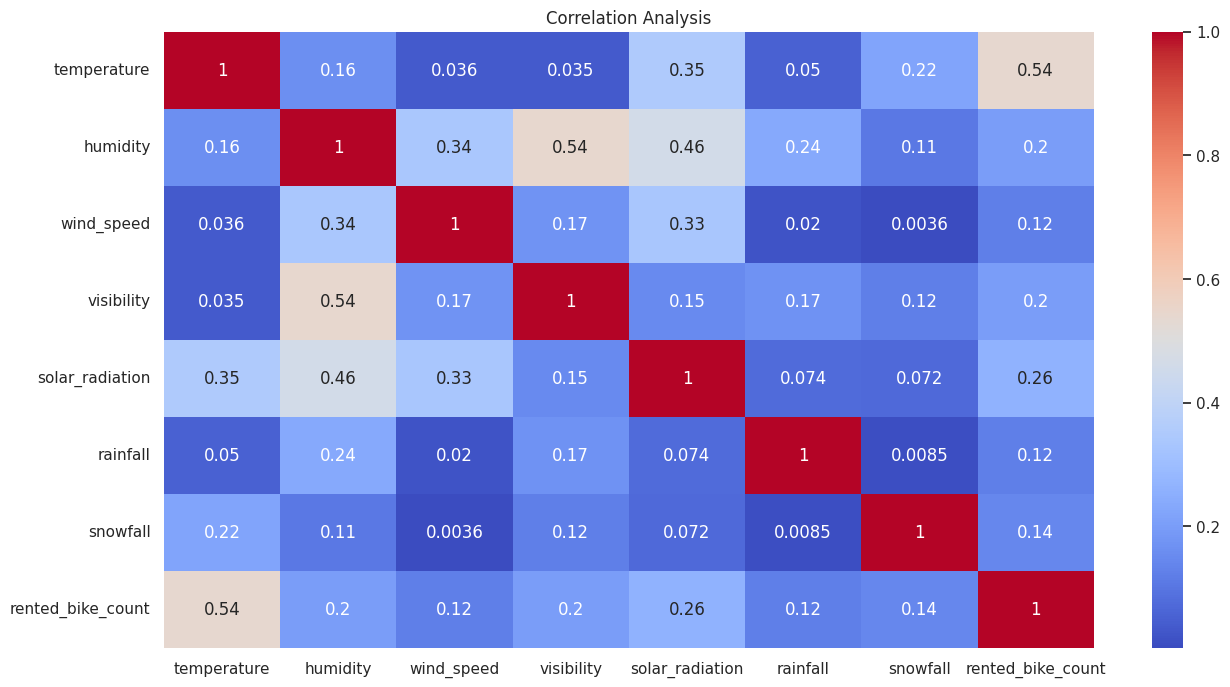

In [ ]:
# Correlation Heatmap visualization code
 ## Correlation magnitude for continuous variables
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var+dependent_variable].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?



From the above graph, we can see that Temperature and Dew_point_temperature is highy correlated, keeping the factor of 0.91 . And, then we have hour in the graph which is having good correlation with our dependent variable.




##### 2. What is/are the insight(s) found from the chart?

here is no multicollinerity in the data.


#### Chart - 15 - Pair Plot

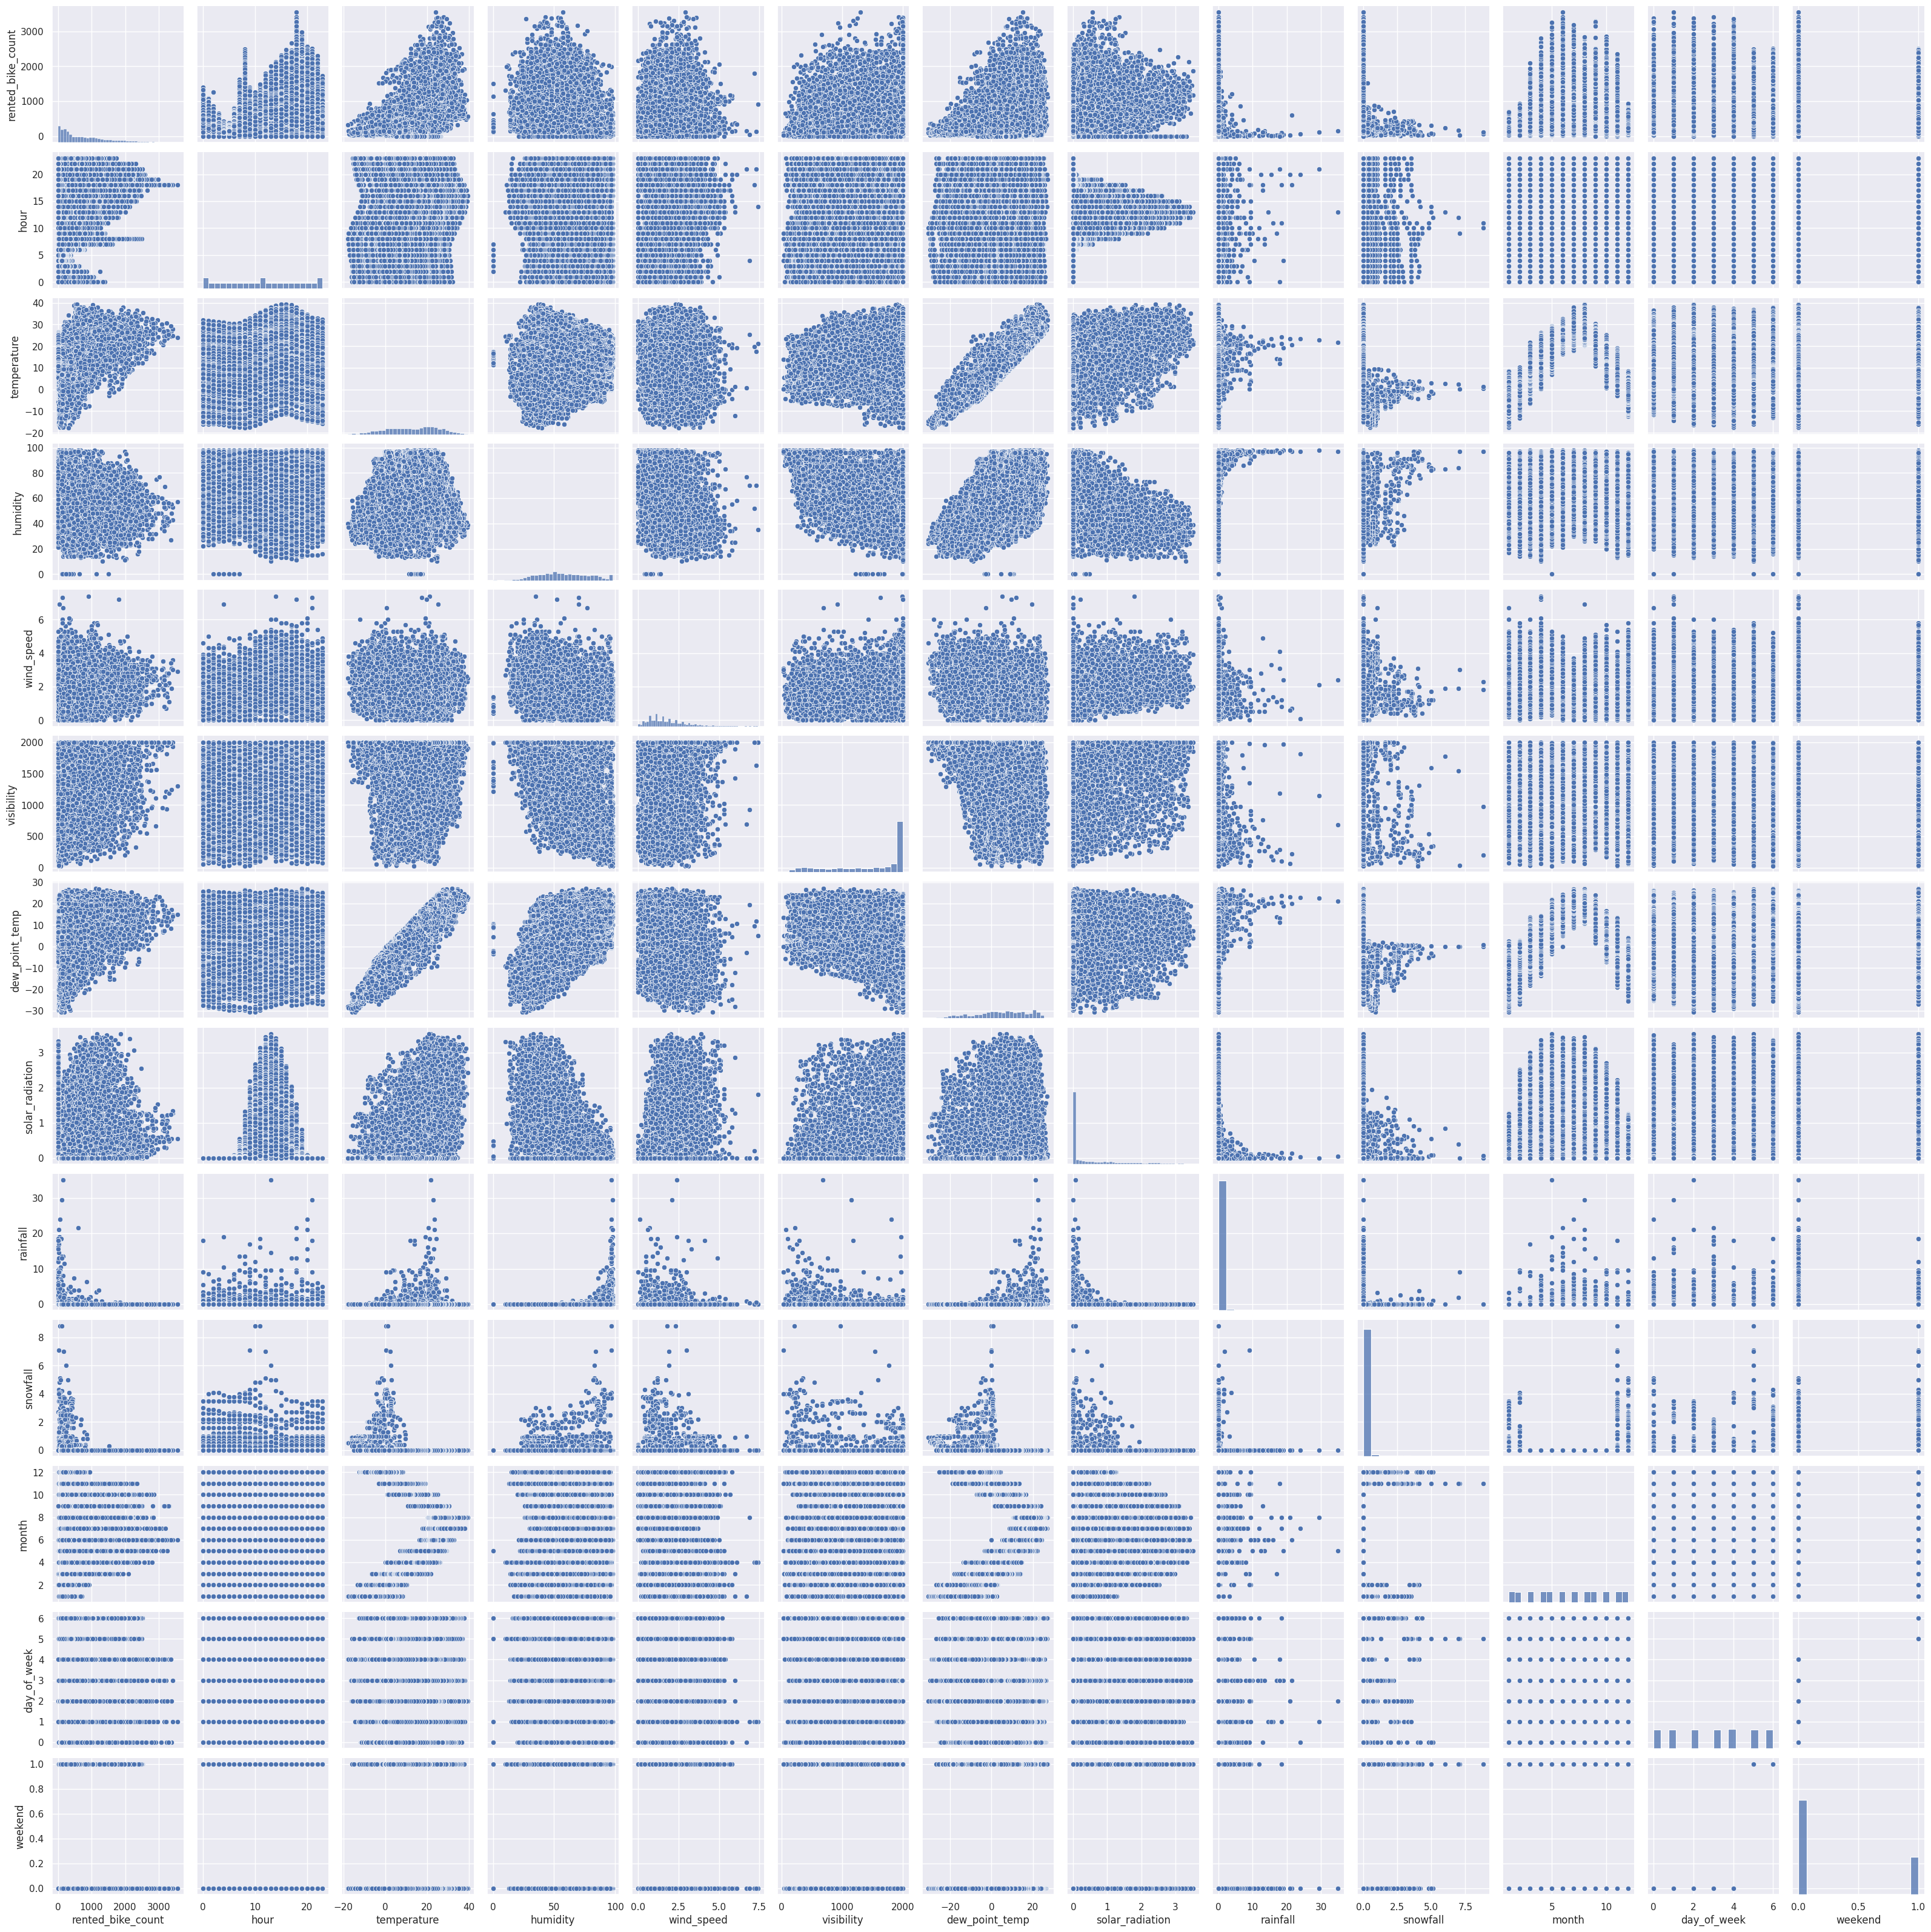

In [ ]:
# Pair Plot visualization code
# # Pair Plot visualization code
sns.pairplot(dataset)

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#Lets see our features again
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day', 'month',
       'day_of_week', 'weekend'],
      dtype='object')

Since there are vaey few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

In [ ]:
# Converting snowfall and rainfall to categorical attributes
df['snowfall'] = df['snowfall'].apply(lambda x: 1 if x>0 else 0)
df['rainfall'] = df['rainfall'].apply(lambda x: 1 if x>0 else 0)

When

1. Visibility >= 20 Km ---> Clear (high visibility)
2. 4 Km <= Visibility < 10 Km ---> Haze (medium visibility)
3. Visibility < 4 Km ---> Fog (low visibility)

Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

In [ ]:
# encoding the visibility column
dataset['visibility'] = pd.cut(df.visibility,bins=[0,399,999,2001],labels=[0,1,2])

Nominal categorical features 'month', 'day_of_week', 'hour' are nominal categorical variables. Hence we need to encode them.

In [ ]:
# one hot encoding
df = pd.get_dummies(df, columns = ['month', 'hour','day_of_week'])

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# NO MISSING VALUES ARE THERE IN OUR DATA SET SO WE WILL SKIP THIS PART

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=dataset,y="rented_bike_count",x="humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=dataset,y="rented_bike_count",x="hour",orient="v",ax=axes[0][0])
sns.boxplot(data=dataset,y="rented_bike_count",x="temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=dataset,y="rented_bike_count",x="wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=dataset,y="rented_bike_count",x="visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=dataset,y="rented_bike_count",x="seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=dataset,y="rented_bike_count",x="holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=dataset,y="rented_bike_count",x="solar_radiation",orient="v",ax=axes[3][1])

Since we have encoded the 'month' and 'day_of_week' attributes, we no longer need 'weekend' and 'seasons' attributes since they essentially convey similar information.

In [ ]:
# dropping seasons and weekend
dataset.drop(['seasons','weekend'],axis=1, inplace=True)

In [ ]:
dataset.head()

### 3. Categorical Encoding

In [ ]:
#Encoding the data to fit a model:

# encoding
dataset['func_day'] = np.where(dataset['func_day'] == 'Yes',1,0)
dataset['holiday'] = np.where(dataset['holiday'] == 'Holiday', 1,0)

In [ ]:
# Dropping date attribute
dataset.drop('date',axis=1,inplace=True)

The date column cannot be used to build a ML model. Hence we can drop it.

In [ ]:
# Defining dependent and independent variables
X = dataset.drop('rented_bike_count',axis=1)
y = np.sqrt(df[dependent_variable])

In [ ]:
# shape of dataframe
df.shape

### 8. Data Splitting

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

##### What data splitting ratio have you used and why?

Since the dataset used here is compact with just 8760 records, and 18 attributes, we can use K-fold cross validation rather than train-test split.

## ***7. ML Model Implementation***

### Evaluation Metric



*   We know that the data we are working with contains outliers, we didnt drop them because if we do so, we may loose out important trends/patterns in the data.
*   Decision Trees or any tree based algorithms that we will use here are known to handle outliers. Hence we can use RMSE as the evaluation metric.

*   Since RMSE penalizes outliers a lot, this is a good metric to check whether ot not the model has learnt all the trends/patterns in the data.
*   In addition to RMSE, we can use R2 score to make the results more explainable to a larger audience.






In [55]:
# defining rmse evaluation metric
def rmse(actual,predicted):
  '''
  rmse(actual_y,predicted_y)
  '''
  mse = mean_squared_error(actual,predicted)
  rmse = np.sqrt(mse)
  return rmse

### ML Model - 1 **Decisison tree**

In [56]:
# ML Model - 1 Implementation
# Using gridsearchcv to find the hyperparameters with best predictions
# A full grown tree has a max depth of 28.
dt_model = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }

In [57]:
# fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,dt_params, cv=6, scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

# model best parameters
dt_best_params

{'max_depth': 20, 'min_samples_leaf': 30}

In [58]:
# building DT model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'], random_state=0)

In [59]:
# fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=30, random_state=0)

In [60]:
# dt train predictions
dt_y_train_pred = dt_model.predict(X_train)

In [61]:
# dt test predictions
dt_y_test_pred = dt_model.predict(X_test)

In [62]:
from sklearn.metrics import r2_score

In [63]:
# train score
dt_train_r2_score = r2_score(np.square(y_train),np.square(dt_y_train_pred))
dt_train_r2_score

# test score
dt_test_r2_score = r2_score(np.square(y_test),np.square(dt_y_test_pred))
dt_test_r2_score

0.8379892694648381

In [64]:
# training rmse
dt_train_rmse = rmse(np.square(y_train),np.square(dt_y_train_pred))
dt_train_rmse

# test rmse
dt_test_rmse = rmse(np.square(y_test),np.square(dt_y_test_pred))
dt_test_rmse

260.3942209438549

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision tree is low bias, high variance model. If we fit a decision tree model on a dataset without tuning the hyperparameters, we get zero RMSE for training data and high RMSE for test data.
Also the R2 score is 1 for train data, and is significantly low when that model is fit on test data.
Our aim is to build a generalized model, that is able to predict the dependent variable for unseen data with less error.
To achieve this, we can tune the decision tree hyperparameters, thereby reducing the model complexity, which in turn improve predictions for the test data

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: DECISION TREE')

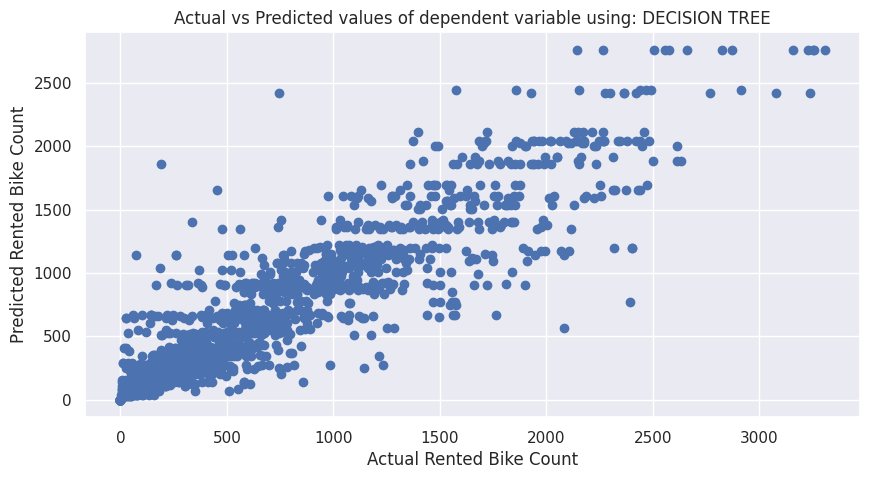

In [65]:
# Predicted vs actual values of dependent variable
plt.figure(figsize=(10,5))
plt.scatter(x=np.square(y_test),y=np.square(dt_y_test_pred))
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: DECISION TREE')

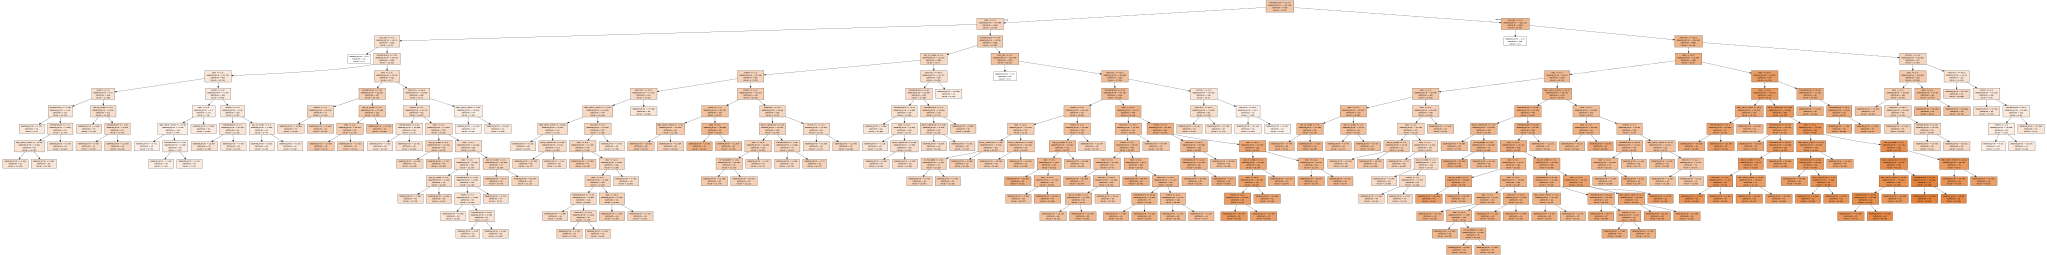

In [66]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=X_train.columns,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

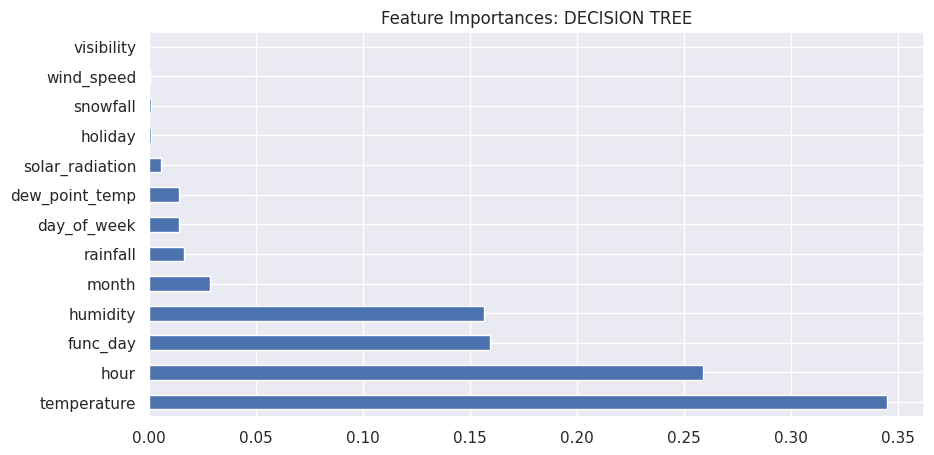

In [67]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

### ML Model - 2 **Random Forest**

In [68]:
# random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(25,31)}     # Approximate range after fitting a decision tree model

In [69]:
# fitting a rf model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [70]:
# best parameters for random forests
rf_best_params

{'min_samples_leaf': 25, 'n_estimators': 500}

In [71]:
# Fitting RF model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [72]:
# fit
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=25, n_estimators=500, random_state=0)

In [73]:
# rf predictions on train data
rf_y_train_pred = rf_model.predict(X_train)

In [74]:
# rf predictions on test data
rf_y_test_pred = rf_model.predict(X_test)

In [75]:
# train score
rf_train_r2_score = r2_score(np.square(y_train),np.square(rf_y_train_pred))
rf_train_r2_score

0.893958924279075

In [76]:
# test score
rf_test_r2_score = r2_score(np.square(y_test),np.square(rf_y_test_pred))
rf_test_r2_score

0.8678083070449587

In [77]:
# train rmse
rf_train_rmse = rmse(np.square(y_train),np.square(rf_y_train_pred))
rf_train_rmse

209.83997854200567

In [78]:
# test rmse
rf_test_rmse = rmse(np.square(y_test),np.square(rf_y_test_pred))
rf_test_rmse

235.21311508440036

<Axes: title={'center': 'Feature Importances: RANDOM FORESTS'}>

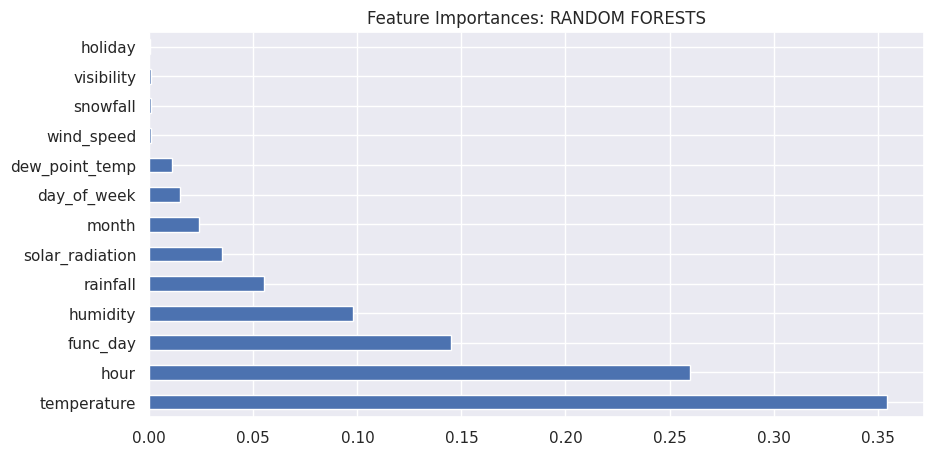

In [79]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

Temperature is the most important feature in predicting the value of the dependent variable for random forests, followed by humidity and func_day.

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: RANDOM FOREST')

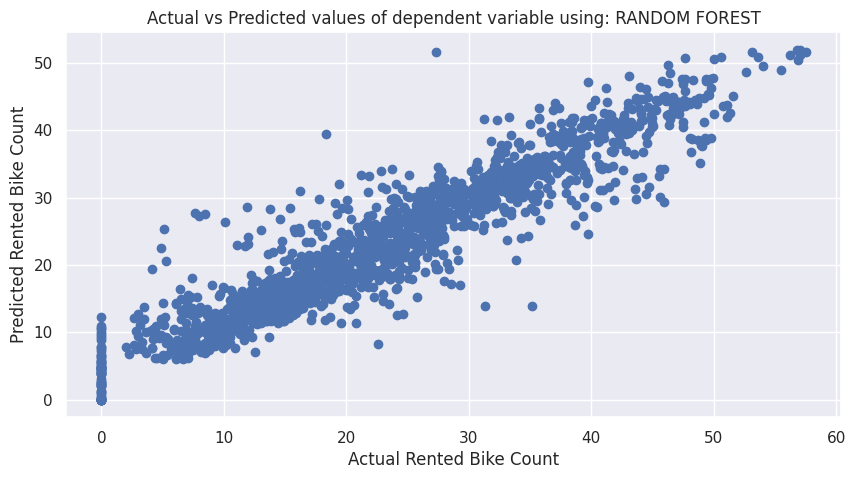

In [80]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=rf_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: RANDOM FOREST')

**Scatter plot of the actual and predicted values of the dependent
variable on test data using random forests.**

### ML Model - 3 **Gradient Boosting**

In [81]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)}

In [82]:
# finding best parameters
gb_gridsearch = GridSearchCV(gb_model,gb_params,cv=6,scoring='neg_root_mean_squared_error')
gb_gridsearch.fit(X_train,y_train)
gb_best_params = gb_gridsearch.best_params_

In [83]:
# GBM best parameters
gb_best_params

{'min_samples_leaf': 25, 'n_estimators': 500}

In [84]:
# Building GBM model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     random_state=0)

In [85]:
# fit
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_leaf=25, n_estimators=500, random_state=0)

In [86]:
# gradient boosing train predictions
gb_y_train_pred = gb_model.predict(X_train)

In [87]:
# gradient boosting test predictions
gb_y_test_pred = gb_model.predict(X_test)

In [88]:
# train score
gb_train_r2_score = r2_score(np.square(y_train),np.square(gb_y_train_pred))
gb_train_r2_score

0.9457715951186741

In [89]:
# test score
gb_test_r2_score = r2_score(np.square(y_test),np.square(gb_y_test_pred))
gb_test_r2_score

0.9290056239223607

In [90]:
# train rmse
gb_train_rmse = rmse(np.square(y_train),np.square(gb_y_train_pred))
gb_train_rmse

150.0598768743068

In [91]:
# test rmse
gb_test_rmse = rmse(np.square(y_test),np.square(gb_y_test_pred))
gb_test_rmse

172.37386704983905

<Axes: title={'center': 'Feature Importances: Gradient Boosting Machine (GBM)'}>

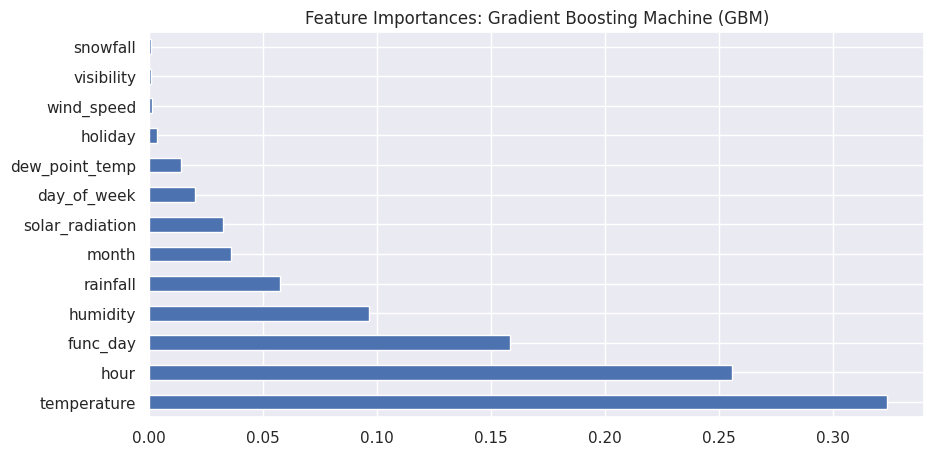

In [92]:
# gradient boosting feature importances
gbm_feat_imp = pd.Series(gb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: Gradient Boosting Machine (GBM)')
plt.xlabel('Relative Importance')
gbm_feat_imp.nlargest(20).plot(kind='barh')

Temperature is the most important feature in predicting the value of the dependent variable using gradient boosting, followed by func_day and humidity.



Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

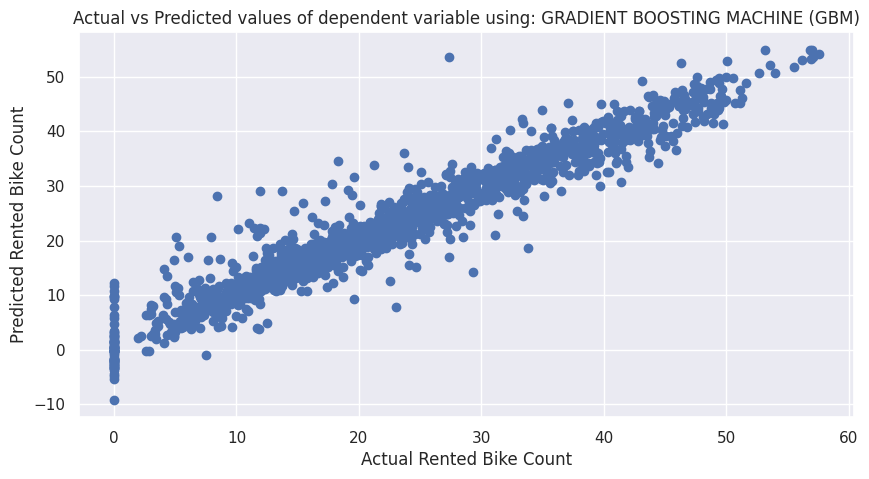

In [93]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=gb_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

Scatter plot of the actual and predicted values of the dependent variable on test data using Gradient boosting.


### ML Model -4 **XG Boost**

In [94]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [95]:
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)}

In [96]:
# finding best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error')
xgb_gridsearch.fit(X_train,y_train)
xgb_best_params = xgb_gridsearch.best_params_

[16:55:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[16:55:33] WARNING: ../src/learner.cc:767: 
Parameters: { "m

In [97]:
# xg boost best parameters
xgb_best_params

{'min_samples_leaf': 25, 'n_estimators': 500}

In [98]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [99]:
# fit
xgb_model.fit(X_train,y_train)

[16:56:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_samples_leaf=25, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [100]:
xgb_y_train_pred = xgb_model.predict(X_train)

In [101]:
xgb_y_test_pred = xgb_model.predict(X_test)

In [102]:
# train score
xgb_train_r2_score = r2_score(np.square(y_train),np.square(xgb_y_train_pred))
xgb_train_r2_score

0.9996044608834076

In [103]:
# test score
xgb_test_r2_score = r2_score(np.square(y_test),np.square(xgb_y_test_pred))
xgb_test_r2_score

0.9492248739067886

In [104]:
# train rmse
xgb_train_rmse = rmse(np.square(y_train),np.square(xgb_y_train_pred))
xgb_train_rmse

12.815804990557924

In [105]:
# test rmse
xgb_test_rmse = rmse(np.square(y_test),np.square(xgb_y_test_pred))
xgb_test_rmse

145.77563994586737

<Axes: title={'center': 'Feature Importances: XG Boost'}>

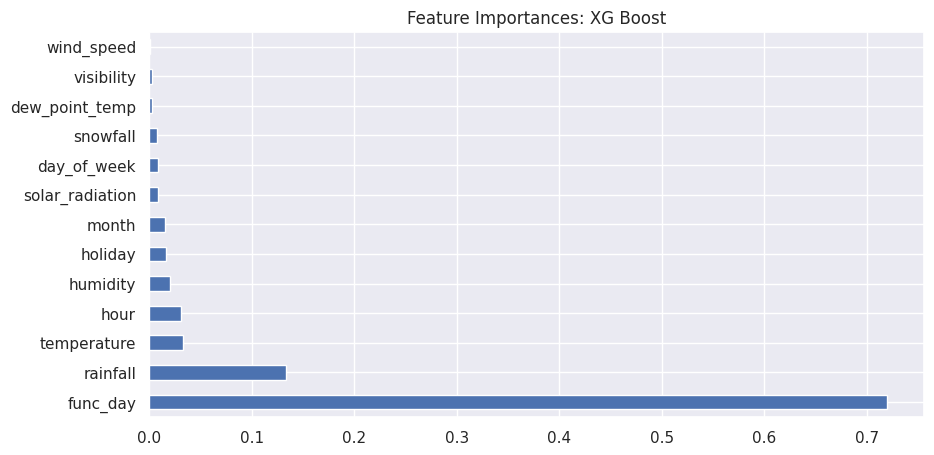

In [106]:
# feature importance
xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

Func_day is the most important feature in predicting the value of the dependent variable follwed by hour_4 and temperature. Many features have a significant importance for XG boost model, rather than the top few features for other models.

Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: XG BOOST')

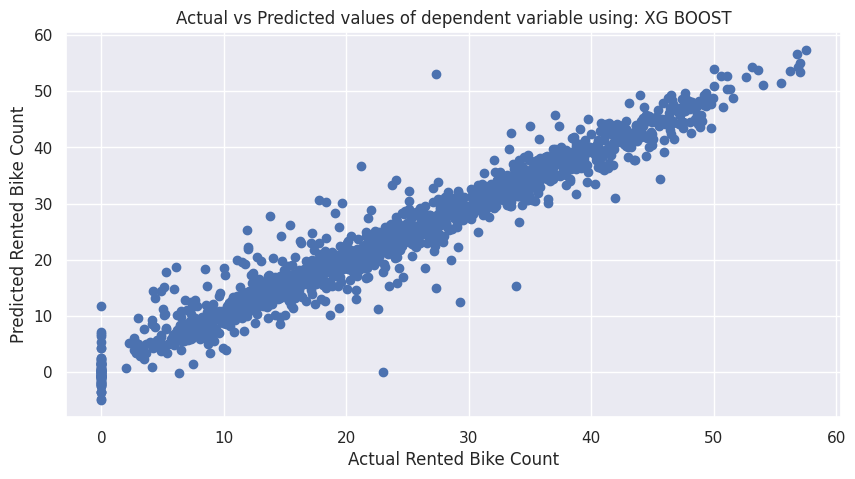

In [107]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=xgb_y_test_pred)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: XG BOOST')

Scatter plot of the actual and predicted values of the dependent variable on test data using XG boost.

# Conclusion from 4 model

In [108]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Regression Model', 'Train RMSE','Test RMSE','Train R2 Score (%)','Test R2 Score (%)'])
test.add_row(['1','Decision Tree',dt_train_rmse,dt_test_rmse,dt_train_r2_score*100,dt_test_r2_score*100])
test.add_row(['2','Random Forests',rf_train_rmse,rf_test_rmse,rf_train_r2_score*100,rf_test_r2_score*100])
test.add_row(['3','Gradient Boosting Method',gb_train_rmse,gb_test_rmse,gb_train_r2_score*100,gb_test_r2_score*100])
test.add_row(['4','XG Boost',xgb_train_rmse,xgb_test_rmse,xgb_train_r2_score*100,xgb_test_r2_score*100])
print(test)

+---------+--------------------------+--------------------+--------------------+--------------------+-------------------+
| Sl. No. |     Regression Model     |     Train RMSE     |     Test RMSE      | Train R2 Score (%) | Test R2 Score (%) |
+---------+--------------------------+--------------------+--------------------+--------------------+-------------------+
|    1    |      Decision Tree       |  234.712091823468  | 260.3942209438549  | 86.73312655250824  |  83.7989269464838 |
|    2    |      Random Forests      | 209.83997854200567 | 235.21311508440036 |  89.3958924279075  | 86.78083070449587 |
|    3    | Gradient Boosting Method | 150.0598768743068  | 172.37386704983905 | 94.57715951186742  | 92.90056239223607 |
|    4    |         XG Boost         | 12.815804990557924 | 145.77563994586737 | 99.96044608834076  | 94.92248739067885 |
+---------+--------------------------+--------------------+--------------------+--------------------+-------------------+


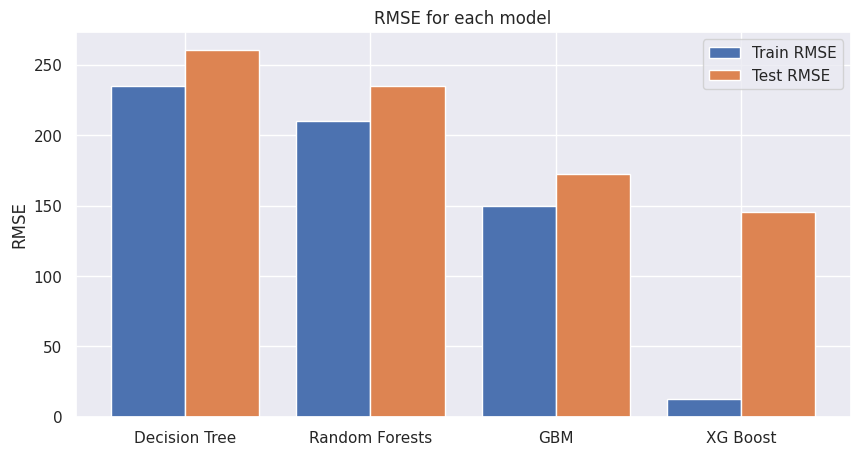

In [109]:
# Plotting RMSEs

ML_models = ['Decision Tree','Random Forests','GBM','XG Boost']
train_rmses = [dt_train_rmse,rf_train_rmse,gb_train_rmse,xgb_train_rmse]
test_rmses = [dt_test_rmse,rf_test_rmse,gb_test_rmse,xgb_test_rmse]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, train_rmses, 0.4, label = 'Train RMSE')
plt.bar(X_axis + 0.2, test_rmses, 0.4, label = 'Test RMSE')

plt.xticks(X_axis,ML_models)
plt.ylabel("RMSE")
plt.title("RMSE for each model")
plt.legend()
plt.show()

The XG boost model was able to predict the dependent variable with the lowest test RMSE.

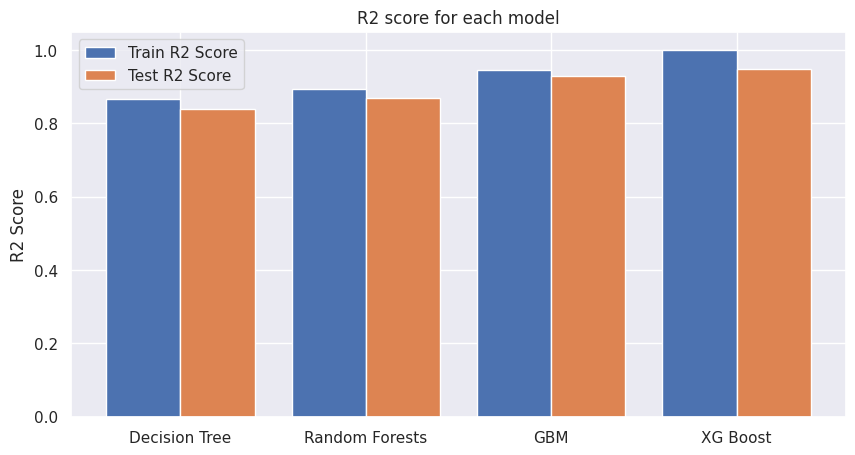

In [110]:
# Plotting R2 scores

ML_models = ['Decision Tree','Random Forests','GBM','XG Boost']
train_r2_scores = [dt_train_r2_score,rf_train_r2_score,gb_train_r2_score,xgb_train_r2_score]
test_r2_scores = [dt_test_r2_score,rf_test_r2_score,gb_test_r2_score,xgb_test_r2_score]

X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, train_r2_scores, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test_r2_scores, 0.4, label = 'Test R2 Score')

plt.xticks(X_axis,ML_models)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

The XG boost model was able to predict the dependent variable with the highest test R2 score.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We will consider XG boost model, because this was able to predict the dependent variable with highest test R2 score and lowest test RMSE

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* We trained 4 unique Machine Learning models using the training dataset, and the its respective performance was improved through hyperparameter tuning.
* We initially started with the decision tree model, mainly because it is easily explainable to the stakeholders, and its low training time.
* Once we were successfully able to fit a decision tree, it was necessary to improve the prediction accuracy, and reduce errors in the predictions.
* To achieve this, we fit a random forest model on the training data, and the final predictions showed less errors compared to that of decision tree model.
* To further improve the predictions of the model, we fit 2 boosting models namely; Gradient boosting machine (GBM) and Extreme gradient boost (XG Boost). The predictions obtained from these models showed errors in the same range, but the errors were lower than that of decision tree model.

The XG Boost model has the lowest RMSE, and the highest R2 score.



Final choice of model depends on:
* If it is absolutely necessary to have a model with the best accuracy, then XG boost will be the best choice, since it has the lowest RMSE than other models built.
* But as discussed above, higher the model complexity, lower is the model explainability. Hence if the predictions must be explained to stakeholers, then XG Boost is not an ideal choice.
* In this case decision tree can be used, since they are easier to explain. By choosing a simpler model, we will be compromising with the model accuracy (Accuracy vs Interpretability tradeoff).

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***